<div style="text-align: center; max-width: 1080px; margin: 0 auto; background-color: #FFA500; color: #ecf0f1; padding: 20px; border-radius: 10px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">
  <h1 style="margin: 0;">New Car Price Prediction</h1>
</div>


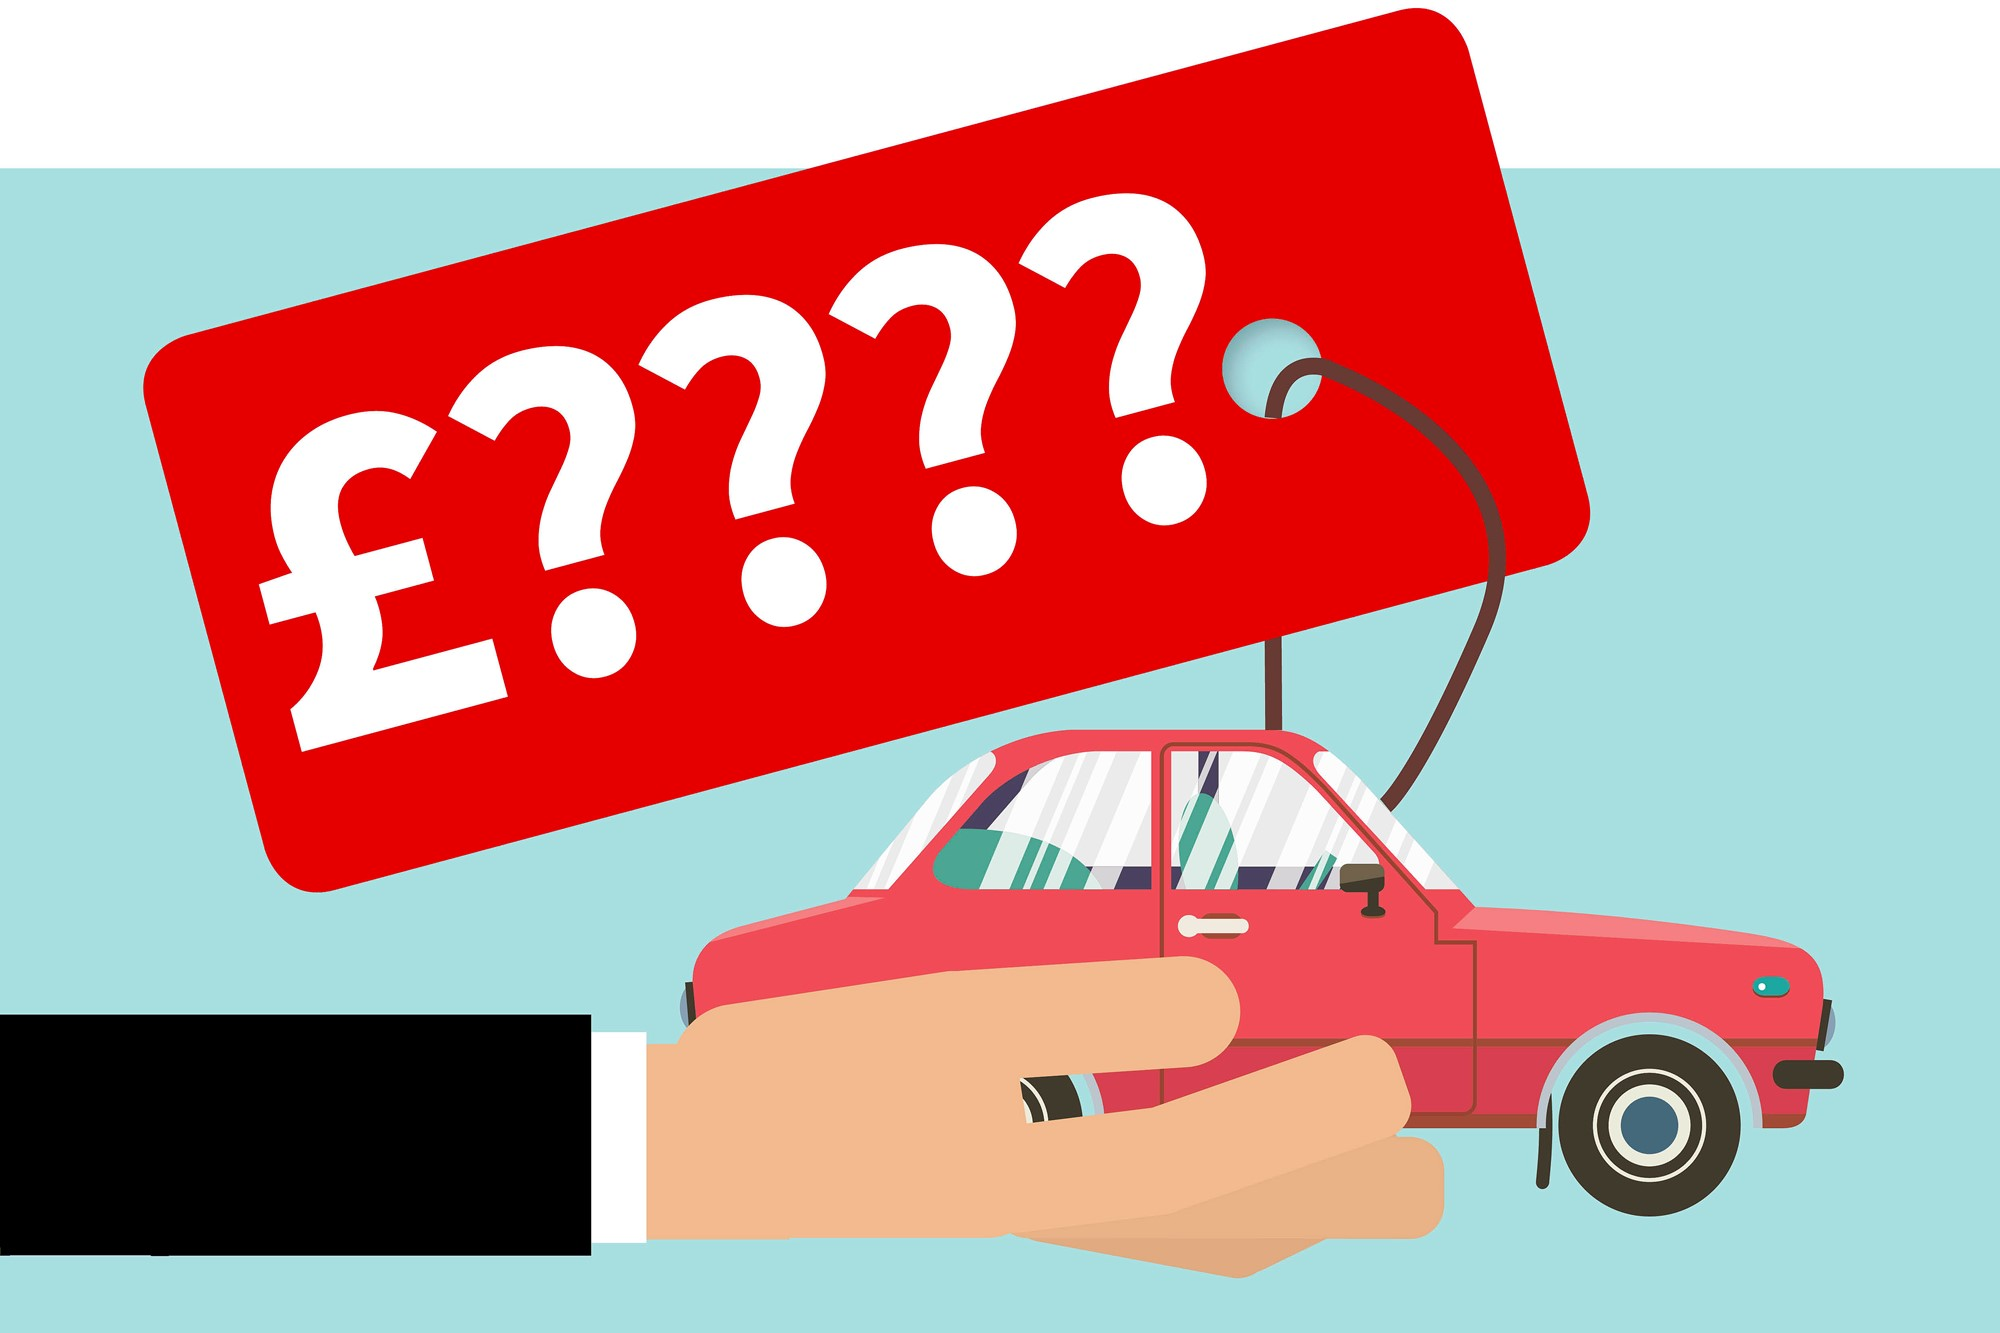

---

<div style="text-align: center;">
    <a href="https://www.linkedin.com/in/sohaib-awan-042b68244" target="_blank" style="text-decoration: none;">
        <button style="background: linear-gradient(45deg, #0077b5, #00a0dc); color: #fff; padding: 15px 30px; border-radius: 40px; font-size: 28px; font-weight: bold; cursor: pointer; border: 2px solid #000; transition: all 0.3s ease;">
            Discover more on LinkedIn
        </button>
    </a>
</div>


---

<details style="border: 1px solid #ddd; padding: 10px; border-radius: 5px;">

<summary><strong>Step by Step Modelling</summary></strong>

- Import libraries
- Load data
- find row and col
- describe data
- datatype of each attribute
- separate based on datatype

#### Data Wrangling
- Check for datatypes
- check for duplicates
- check for missing values
- Text data cleaning
- Check outliers

#### EDA
- correlation analysis
- descriptive analysis
- skewed data

#### Feature Engineering
- create new feature
- handle data & time
- binning / descritization
- encode categorical variables
- Dimensionlity reduction
- PCA
- Assumptions
- Feature scaling and normalization
- feature selection

#### Predictive Modelling
- Choosing independent & dependent features
- Train Test Evaluation
- Cross validation
- hyper parameter tuning
- Model Training and Prediction

#### Model Evaluation
- Accuracy Score
- mean absolute error
- mean squared error
- root mean squared error
- R2
- Adjusted R2
- Overfitting & Underfitting

</details>

<h2>1. <u>Importing Libraries</u></h2>

In [1732]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import SelectKBest, f_regression, RFE, SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
plt.style.use('default')
import warnings
warnings.filterwarnings('ignore')

<h2>2. <u>Data Exploration

In [1733]:
car_data_A = pd.read_csv("D:\\PROGRAMMING\\DATASETS\\G\\LinReg\\new_automobile.csv")
print(car_data_A.shape)
car_data_A

(205, 27)


Unnamed: 0   symboling   normalized-losses   make            fuel-type    
0              0           3                 161  alfa-romero     gas         \
1              1           3                 161  alfa-romero     gas          
2              2           1                 161  alfa-romero     gas          
3              3           2                 164  audi            gas          
4              4           2                 164  audi            gas          
5              5           2                 161  audi            gas          
6              6           1                 158  audi            gas          
7              7           1                 161  audi            gas          
8              8           1                 158  audi            gas          
9              9           0                 161  audi            gas          
10            10           2                 192  bmw             gas          
11            11           0                 192  bmw             gas          
12            12           0                 188  bmw             gas          
13            13           0                 188  bmw             gas          
14            14           1                 161  bmw             gas          
15            15           0                 161  bmw             gas          
16            16           0                 161  bmw             gas          
17            17           0                 161  bmw             gas          
18            18           2                 121  chevrolet       gas          
19            19           1                  98  chevrolet       gas          
20            20           0                  81  chevrolet       gas          
21            21           1                 118  dodge           gas          
22            22           1                 118  dodge           gas          
23            23           1                 118  dodge           gas          
24            24           1                 148  dodge           gas          
25            25           1                 148  dodge           gas          
26            26           1                 148  dodge           gas          
27            27           1                 148  dodge           gas          
28            28          -1                 110  dodge           gas          
29            29           3                 145  dodge           gas          
30            30           2                 137  honda           gas          
31            31           2                 137  honda           gas          
32            32           1                 101  honda           gas          
33            33           1                 101  honda           gas          
34            34           1                 101  honda           gas          
35            35           0                 110  honda           gas          
36            36           0                  78  honda           gas          
37            37           0                 106  honda           gas          
38            38           0                 106  honda           gas          
39            39           0                  85  honda           gas          
40            40           0                  85  honda           gas          
41            41           0                  85  honda           gas          
42            42           1                 107  honda           gas          
43            43           0                 161  isuzu           gas          
44            44           1                 161  isuzu           gas          
45            45           0                 161  isuzu           gas          
46            46           2                 161  isuzu           gas          
47            47           0                 145  jaguar          gas          
48            48           0                 161  jaguar          gas          
49   

In [1734]:
describe_car = car_data_A.describe().round(2)
describe_car

Unnamed: 0   symboling   normalized-losses   wheel-base   length    
count       205.00      205.00              205.00       205.00   205.00  \
mean        102.00        0.83              129.80        98.76   174.05   
std          59.32        1.25               35.33         6.02    12.34   
min           0.00       -2.00               65.00        86.60   141.10   
25%          51.00        0.00              101.00        94.50   166.30   
50%         102.00        1.00              128.00        97.00   173.20   
75%         153.00        2.00              161.00       102.40   183.10   
max         204.00        3.00              256.00       120.90   208.10   

       width   height   curb-weight   engine-size    bore   stroke    
count  205.00   205.00        205.00        205.00  205.00   205.00  \
mean    65.91    53.72       2555.57        126.91    3.34     3.26   
std      2.15     2.44        520.68         41.64    0.27     0.31   
min     60.30    47.80       1488.00         61.00    2.54     2.07   
25%     64.10    52.00       2145.00         97.00    3.15     3.11   
50%     65.50    54.10       2414.00        120.00    3.31     3.29   
75%     66.90    55.50       2935.00        141.00    3.60     3.41   
max     72.30    59.80       4066.00        326.00    3.94     4.17   

       compression-ratio   horsepower   peak-rpm   city-mpg   highway-mpg    
count              205.00       205.00     205.00     205.00        205.00  \
mean                10.14       103.90    5129.02      25.22         30.75   
std                  3.97        39.68     478.41       6.54          6.89   
min                  7.00        48.00    4150.00      13.00         16.00   
25%                  8.60        70.00    4800.00      19.00         25.00   
50%                  9.00        95.00    5200.00      24.00         30.00   
75%                  9.40       116.00    5500.00      30.00         34.00   
max                 23.00       288.00    6600.00      49.00         54.00   

          price  
count    205.00  
mean   13212.82  
std     7868.87  
min     5118.00  
25%     7788.00  
50%    10595.00  
75%    16500.00  
max    45400.00

In [1735]:
car_data_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          205 non-null    int64  
 1   symboling           205 non-null    int64  
 2   normalized-losses   205 non-null    int64  
 3   make                205 non-null    object 
 4   fuel-type           205 non-null    object 
 5   aspiration          205 non-null    object 
 6   num-of-doors        205 non-null    object 
 7   body-style          205 non-null    object 
 8   drive-wheels        205 non-null    object 
 9   engine-location     205 non-null    object 
 10  wheel-base          205 non-null    float64
 11  length              205 non-null    float64
 12  width               205 non-null    float64
 13  height              205 non-null    float64
 14  curb-weight         205 non-null    int64  
 15  engine-type         205 non-null    object 
 16  num-of-c

In [1736]:
## Checking for total datatypes and their occurence
dtp = car_data_A.dtypes
car_dtype = dict(dtp.value_counts())
for d, c in car_dtype.items():
    print(f"{d} -> {c}")

int64 -> 10
object -> 10
float64 -> 7


In [1737]:
## separate columns based on datatype
total_data_types = list(car_data_A.dtypes.unique())
dict_type = {
    'int64' : (car_data_A.select_dtypes(include=['int64']).columns).tolist(),
    'object' : (car_data_A.select_dtypes(include=['object']).columns).tolist(),
    'float64' : (car_data_A.select_dtypes(include=['float64']).columns).tolist()
}
for d, c in dict_type.items():
    print(f"{d} : {c} \n\n")

int64 : ['Unnamed: 0 ', 'symboling ', 'normalized-losses ', 'curb-weight ', 'engine-size ', 'horsepower ', 'peak-rpm ', 'city-mpg ', 'highway-mpg ', 'price'] 


object : ['make          ', 'fuel-type ', 'aspiration ', 'num-of-doors ', 'body-style  ', 'drive-wheels ', 'engine-location ', 'engine-type ', 'num-of-cylinders ', 'fuel-system '] 


float64 : ['wheel-base ', 'length ', 'width ', 'height ', 'bore ', 'stroke ', 'compression-ratio '] 




In [1738]:
correl_data = car_data_A.select_dtypes(include=['int64', 'float64'])
cor_data = correl_data.corr().round(4)
cor_data

Unnamed: 0   symboling   normalized-losses   wheel-base    
Unnamed: 0               1.0000     -0.1516             -0.2924       0.1297  \
symboling               -0.1516      1.0000              0.4467      -0.5320   
normalized-losses       -0.2924      0.4467              1.0000       0.0366   
wheel-base               0.1297     -0.5320              0.0366       1.0000   
length                   0.1706     -0.3576              0.1475       0.8746   
width                    0.0524     -0.2329              0.2033       0.7951   
height                   0.2560     -0.5410             -0.3504       0.5894   
curb-weight              0.0720     -0.2277              0.2535       0.7764   
engine-size             -0.0339     -0.1058              0.2903       0.5693   
bore                     0.2413     -0.0925              0.0849       0.4715   
stroke                  -0.1674      0.0070              0.1042       0.1554   
compression-ratio        0.1503     -0.1785             -0.0992       0.2498   
horsepower              -0.0176      0.0699              0.3538       0.3545   
peak-rpm                -0.1992      0.2739              0.1963      -0.3630   
city-mpg                 0.0159     -0.0358             -0.3384      -0.4704   
highway-mpg              0.0113      0.0346             -0.3011      -0.5441   
price                   -0.1171     -0.0824              0.3171       0.5829   

                    length   width   height   curb-weight   engine-size    
Unnamed: 0           0.1706  0.0524   0.2560        0.0720       -0.0339  \
symboling           -0.3576 -0.2329  -0.5410       -0.2277       -0.1058   
normalized-losses    0.1475  0.2033  -0.3504        0.2535        0.2903   
wheel-base           0.8746  0.7951   0.5894        0.7764        0.5693   
length               1.0000  0.8411   0.4910        0.8777        0.6834   
width                0.8411  1.0000   0.2792        0.8670        0.7354   
height               0.4910  0.2792   1.0000        0.2956        0.0671   
curb-weight          0.8777  0.8670   0.2956        1.0000        0.8506   
engine-size          0.6834  0.7354   0.0671        0.8506        1.0000   
bore                 0.5914  0.5511   0.1342        0.6357        0.5503   
stroke               0.1256  0.1817  -0.0705        0.1659        0.1909   
compression-ratio    0.1584  0.1811   0.2612        0.1514        0.0290   
horsepower           0.5485  0.6369  -0.1065        0.7485        0.8063   
peak-rpm            -0.2830 -0.2169  -0.3224       -0.2660       -0.2429   
city-mpg            -0.6709 -0.6427  -0.0486       -0.7574       -0.6537   
highway-mpg         -0.7047 -0.6772  -0.1074       -0.7975       -0.6775   
price                0.6825  0.7290   0.1338        0.8208        0.8618   

                     bore   stroke   compression-ratio   horsepower    
Unnamed: 0          0.2413  -0.1674              0.1503      -0.0176  \
symboling          -0.0925   0.0070             -0.1785       0.0699   
normalized-losses   0.0849   0.1042             -0.0992       0.3538   
wheel-base          0.4715   0.1554              0.2498       0.3545   
length              0.5914   0.1256              0.1584       0.5485   
width               0.5511   0.1817              0.1811       0.6369   
height              0.1342  -0.0705              0.2612      -0.1065   
curb-weight         0.6357   0.1659              0.1514       0.7485   
engine-size         0.5503   0.1909              0.0290       0.8063   
bore                1.0000  -0.0458              0.0013       0.5658   
stroke             -0.0458   1.0000              0.1840       0.0706   
compression-ratio   0.0013   0.1840              1.0000      -0.2017   
horsepower          0.5658   0.0706             -0.2017       1.0000   
peak-rpm           -0.2098  -0.0343             -0.4374       0.1231   
city-mpg           -0.6051  -0.0538              0.3247      -0.7969   
highway-mpg        -0.6040  -0.0540              0.2652   

<Axes: >

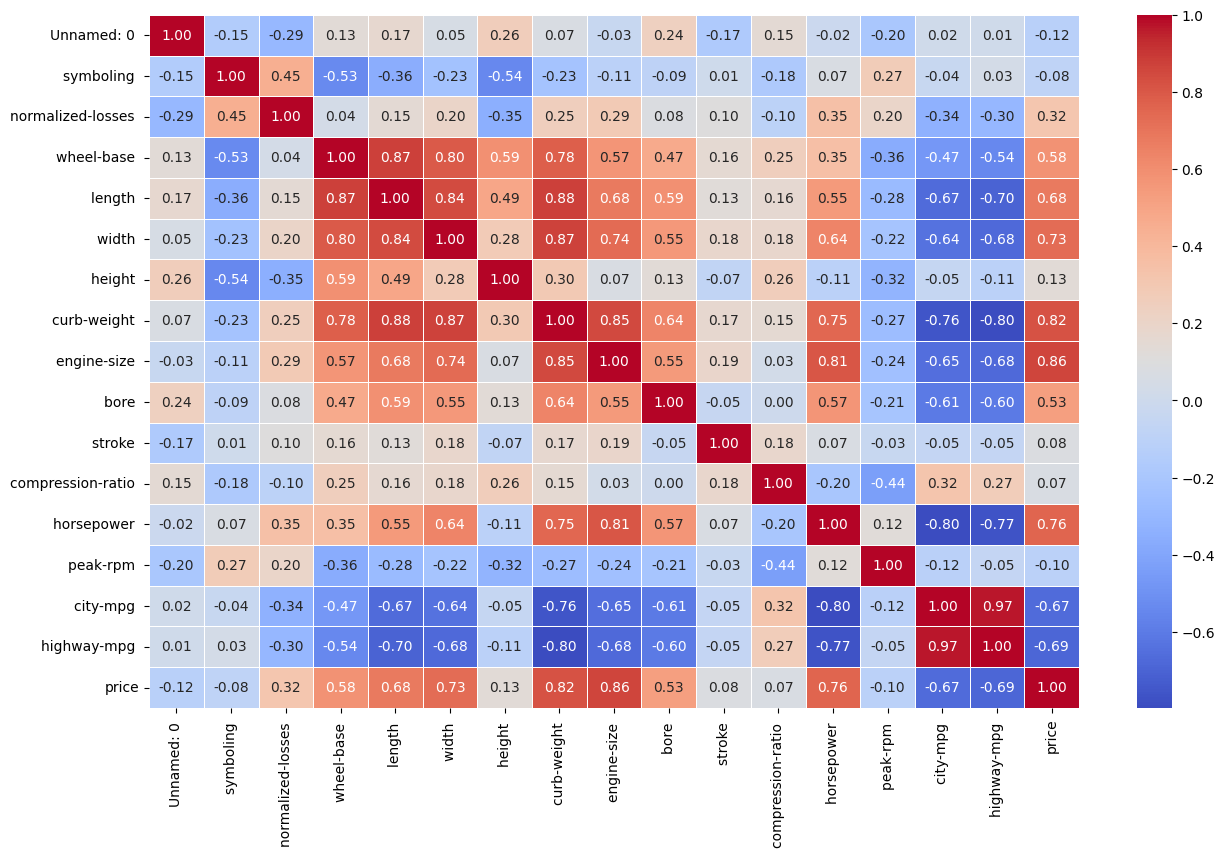

In [1739]:
plt.figure(figsize=(15, 9))
sb.heatmap(correl_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [1740]:
## showing correlation of each attribute with all others
for k in correl_data:
    print(f"\n-------{k}:")
    print(cor_data[k].sort_values(ascending=False))


-------Unnamed: 0 :
Unnamed: 0            1.0000
height                0.2560
bore                  0.2413
length                0.1706
compression-ratio     0.1503
wheel-base            0.1297
curb-weight           0.0720
width                 0.0524
city-mpg              0.0159
highway-mpg           0.0113
horsepower           -0.0176
engine-size          -0.0339
price                -0.1171
symboling            -0.1516
stroke               -0.1674
peak-rpm             -0.1992
normalized-losses    -0.2924
Name: Unnamed: 0 , dtype: float64

-------symboling :
symboling             1.0000
normalized-losses     0.4467
peak-rpm              0.2739
horsepower            0.0699
highway-mpg           0.0346
stroke                0.0070
city-mpg             -0.0358
price                -0.0824
bore                 -0.0925
engine-size          -0.1058
Unnamed: 0           -0.1516
compression-ratio    -0.1785
curb-weight          -0.2277
width                -0.2329
length               -0.35

In [1741]:
## correlation of each attribute with target variable
correl_data.corr()['price'].sort_values(ascending=False)

price                 1.000000
engine-size           0.861769
curb-weight           0.820807
horsepower            0.759731
width                 0.729009
length                0.682528
wheel-base            0.582915
bore                  0.525878
normalized-losses     0.317097
height                0.133761
stroke                0.081537
compression-ratio     0.070789
symboling            -0.082396
peak-rpm             -0.103493
Unnamed: 0           -0.117108
city-mpg             -0.667215
highway-mpg          -0.690173
Name: price, dtype: float64

In [1742]:
# sb.pairplot(car_data_A)

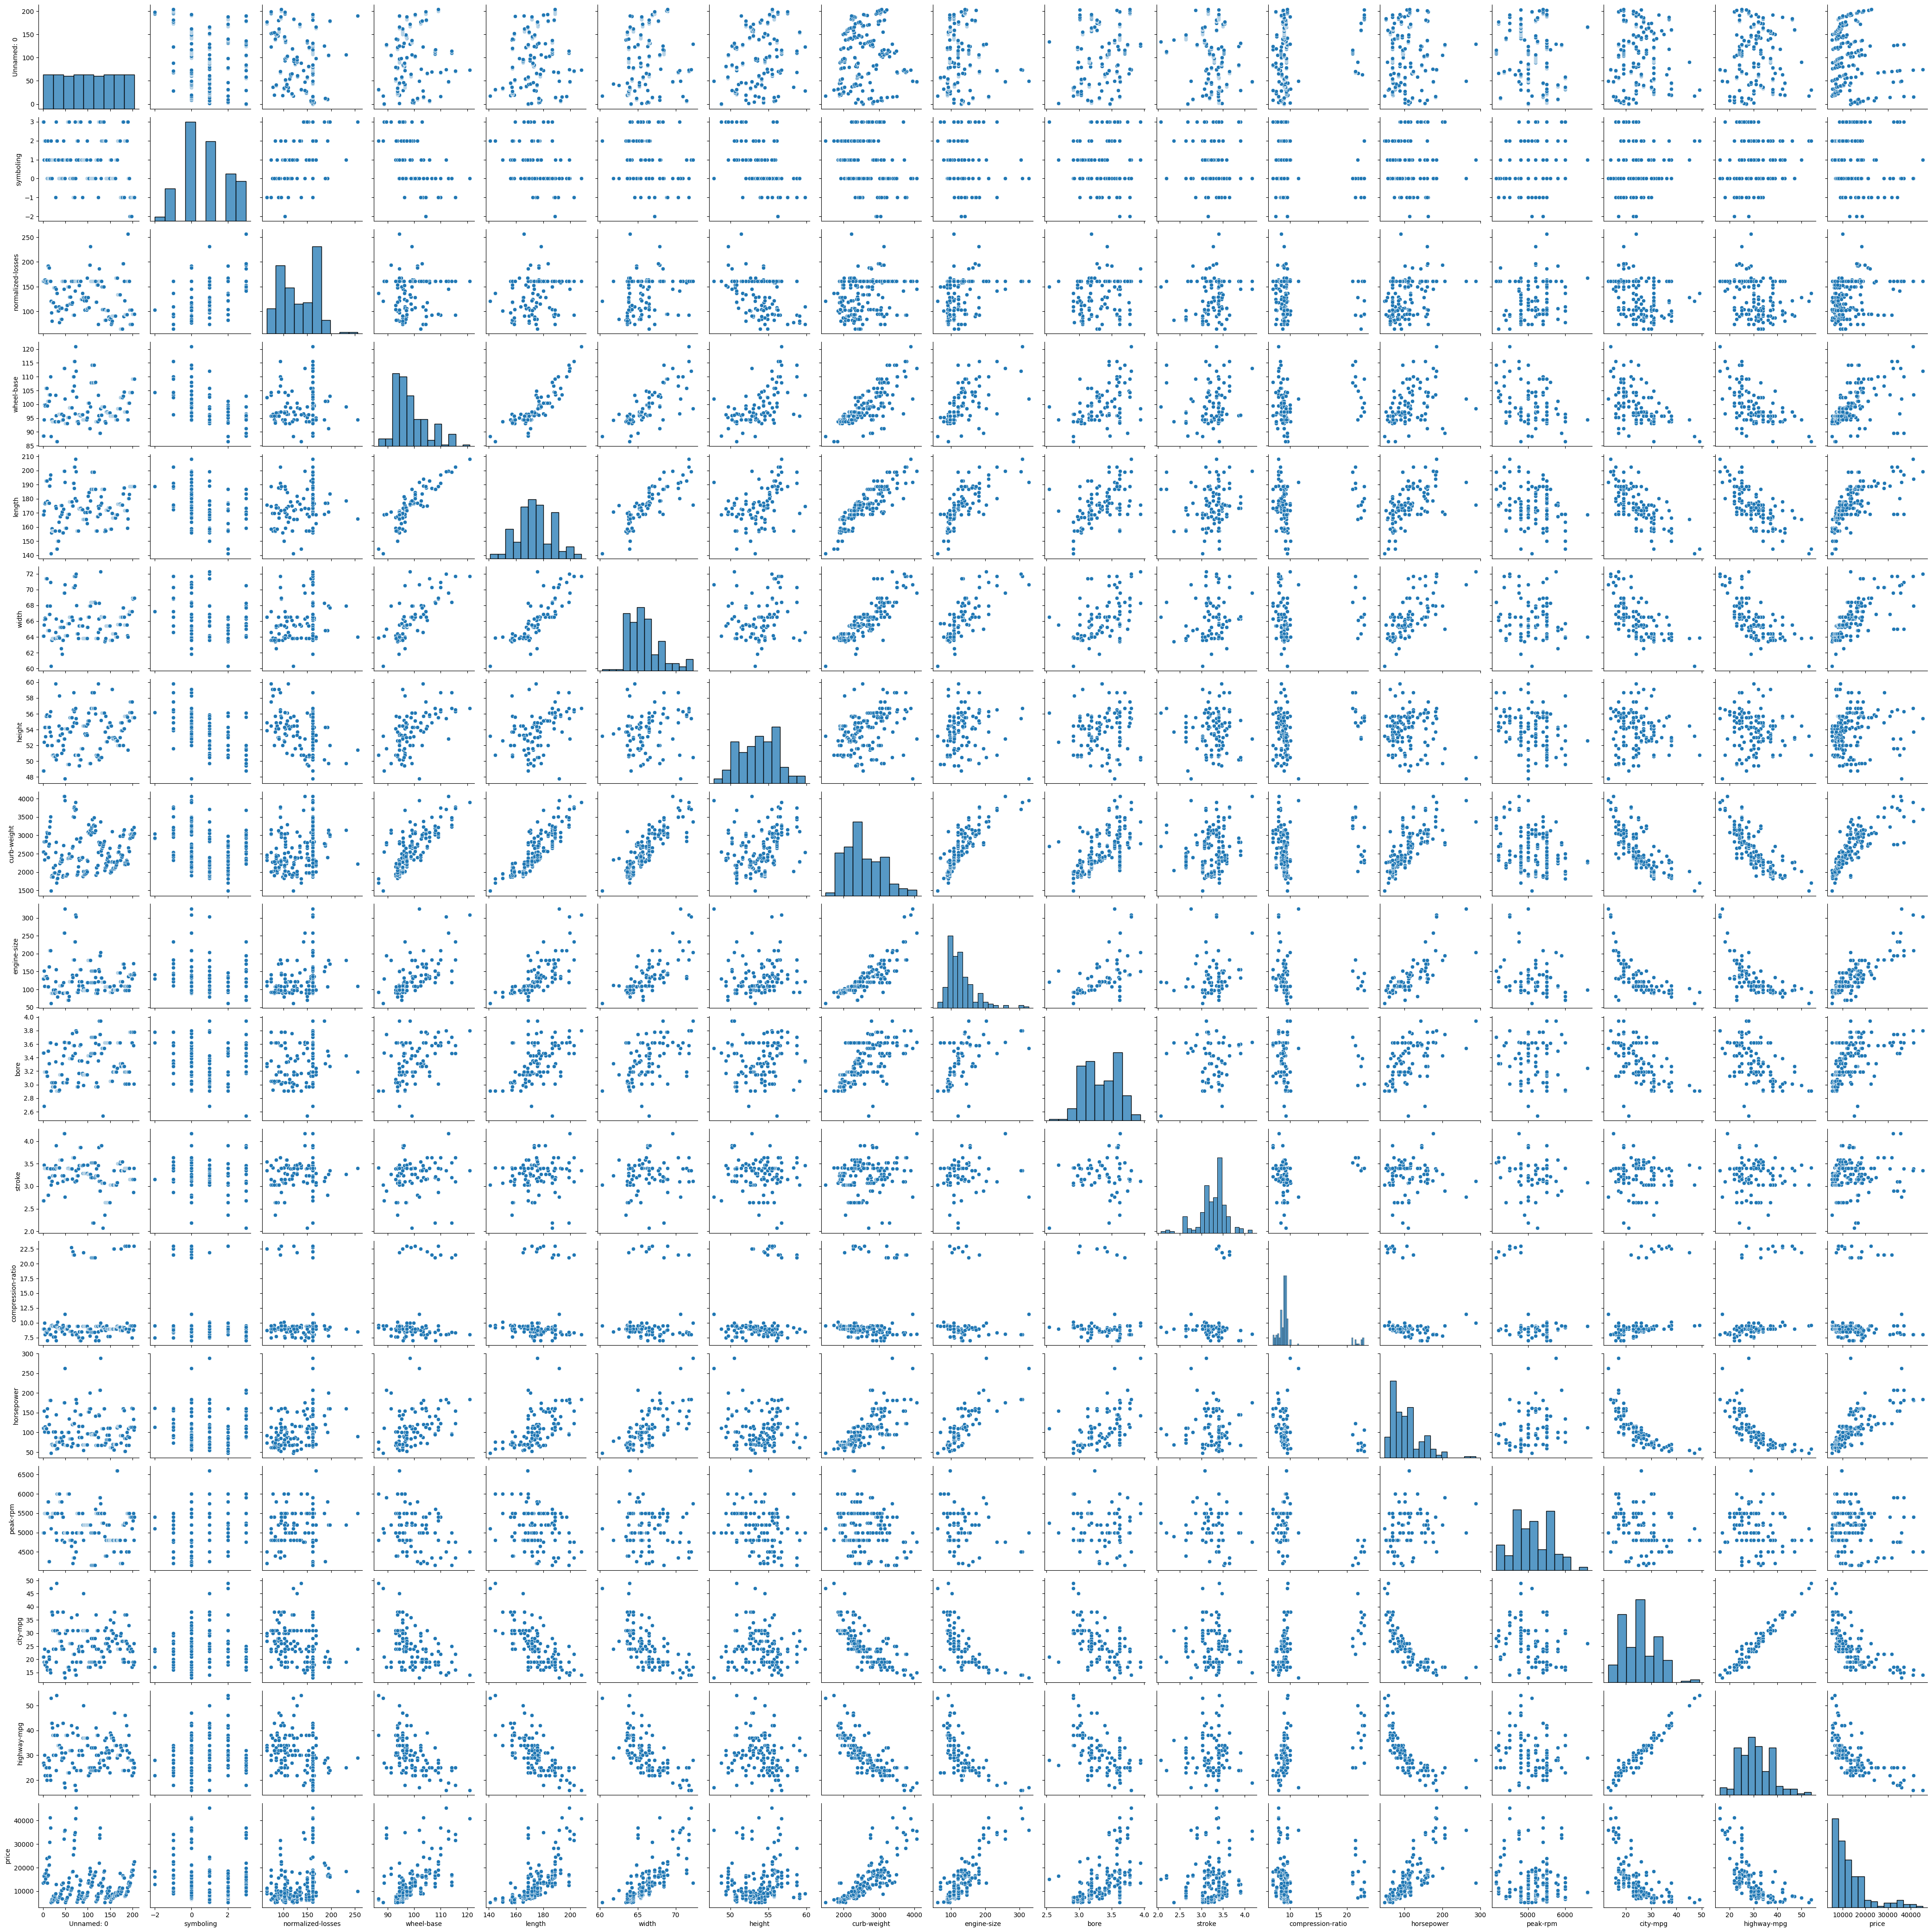

In [1743]:
## Counting the categorical attributes values
for k in dict_type['object']:
    print(f"\n------{k}--------:")
    print(car_data_A[k].value_counts())



------make          --------:
make          
toyota            32
nissan            18
mazda             17
mitsubishi        13
honda             13
volkswagen        12
subaru            12
peugot            11
volvo             11
dodge              9
mercedes-benz      8
bmw                8
audi               7
plymouth           7
saab               6
porsche            5
isuzu              4
jaguar             3
chevrolet          3
alfa-romero        3
renault            2
mercury            1
Name: count, dtype: int64

------fuel-type --------:
fuel-type 
gas           185
diesel         20
Name: count, dtype: int64

------aspiration --------:
aspiration 
std            168
turbo           37
Name: count, dtype: int64

------num-of-doors --------:
num-of-doors 
four             116
two               89
Name: count, dtype: int64

------body-style  --------:
body-style  
sedan           96
hatchback       70
wagon           25
hardtop          8
convertible      6
Name: count, 

<h2>3.<u>Data Wrangling

<h4>1. Check For Data Types

In [1744]:
with pd.option_context('display.max_columns', None):
    display(car_data_A.head())

Unnamed: 0   symboling   normalized-losses   make            fuel-type    
0            0           3                 161  alfa-romero     gas         \
1            1           3                 161  alfa-romero     gas          
2            2           1                 161  alfa-romero     gas          
3            3           2                 164  audi            gas          
4            4           2                 164  audi            gas          

   aspiration   num-of-doors   body-style    drive-wheels   engine-location    
0  std          two            convertible   rwd            front             \
1  std          two            convertible   rwd            front              
2  std          two            hatchback     rwd            front              
3  std          four           sedan         fwd            front              
4  std          four           sedan         4wd            front              

   wheel-base   length   width   height   curb-weight   engine-type    
0         88.6    168.8    64.1     48.8          2548  dohc          \
1         88.6    168.8    64.1     48.8          2548  dohc           
2         94.5    171.2    65.5     52.4          2823  ohcv           
3         99.8    176.6    66.2     54.3          2337  ohc            
4         99.4    176.6    66.4     54.3          2824  ohc            

   num-of-cylinders   engine-size   fuel-system   bore   stroke    
0  four                        130  mpfi           3.47     2.68  \
1  four                        130  mpfi           3.47     2.68   
2  six                         152  mpfi           2.68     3.47   
3  four                        109  mpfi           3.19     3.40   
4  five                        136  mpfi           3.19     3.40   

   compression-ratio   horsepower   peak-rpm   city-mpg   highway-mpg   price  
0                 9.0          111       5000         21            27  13495  
1                 9.0          111       5000         21            27  16500  
2                 9.0          154       5000         19            26  16500  
3                10.0          102       5500         24            30  13950  
4                 8.0          115       5500         18            22  17450

In [1745]:
car_data_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          205 non-null    int64  
 1   symboling           205 non-null    int64  
 2   normalized-losses   205 non-null    int64  
 3   make                205 non-null    object 
 4   fuel-type           205 non-null    object 
 5   aspiration          205 non-null    object 
 6   num-of-doors        205 non-null    object 
 7   body-style          205 non-null    object 
 8   drive-wheels        205 non-null    object 
 9   engine-location     205 non-null    object 
 10  wheel-base          205 non-null    float64
 11  length              205 non-null    float64
 12  width               205 non-null    float64
 13  height              205 non-null    float64
 14  curb-weight         205 non-null    int64  
 15  engine-type         205 non-null    object 
 16  num-of-c

<h4>2. Check for duplicates

In [1746]:
car_data_A.duplicated().sum()

0

<h4>4. Missing Values

In [1747]:
car_data_A.isnull().sum()

Unnamed: 0            0
symboling             0
normalized-losses     0
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

<h2>5. <u>Exploratory Data Analysis

1. which company made more & how many cars?

In [1748]:
car_data_A.head()

Unnamed: 0   symboling   normalized-losses   make            fuel-type    
0            0           3                 161  alfa-romero     gas         \
1            1           3                 161  alfa-romero     gas          
2            2           1                 161  alfa-romero     gas          
3            3           2                 164  audi            gas          
4            4           2                 164  audi            gas          

   aspiration   num-of-doors   body-style    drive-wheels   engine-location    
0  std          two            convertible   rwd            front             \
1  std          two            convertible   rwd            front              
2  std          two            hatchback     rwd            front              
3  std          four           sedan         fwd            front              
4  std          four           sedan         4wd            front              

   wheel-base   length   width   height   curb-weight   engine-type    
0         88.6    168.8    64.1     48.8          2548  dohc          \
1         88.6    168.8    64.1     48.8          2548  dohc           
2         94.5    171.2    65.5     52.4          2823  ohcv           
3         99.8    176.6    66.2     54.3          2337  ohc            
4         99.4    176.6    66.4     54.3          2824  ohc            

   num-of-cylinders   engine-size   fuel-system   bore   stroke    
0  four                        130  mpfi           3.47     2.68  \
1  four                        130  mpfi           3.47     2.68   
2  six                         152  mpfi           2.68     3.47   
3  four                        109  mpfi           3.19     3.40   
4  five                        136  mpfi           3.19     3.40   

   compression-ratio   horsepower   peak-rpm   city-mpg   highway-mpg   price  
0                 9.0          111       5000         21            27  13495  
1                 9.0          111       5000         21            27  16500  
2                 9.0          154       5000         19            26  16500  
3                10.0          102       5500         24            30  13950  
4                 8.0          115       5500         18            22  17450

In [1749]:
car_data_A.columns

Index(['Unnamed: 0 ', 'symboling ', 'normalized-losses ', 'make          ',
       'fuel-type ', 'aspiration ', 'num-of-doors ', 'body-style  ',
       'drive-wheels ', 'engine-location ', 'wheel-base ', 'length ', 'width ',
       'height ', 'curb-weight ', 'engine-type ', 'num-of-cylinders ',
       'engine-size ', 'fuel-system ', 'bore ', 'stroke ',
       'compression-ratio ', 'horsepower ', 'peak-rpm ', 'city-mpg ',
       'highway-mpg ', 'price'],
      dtype='object')

In [1750]:
car_data_A.columns = car_data_A.columns.str.strip()
car_data_A.columns

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

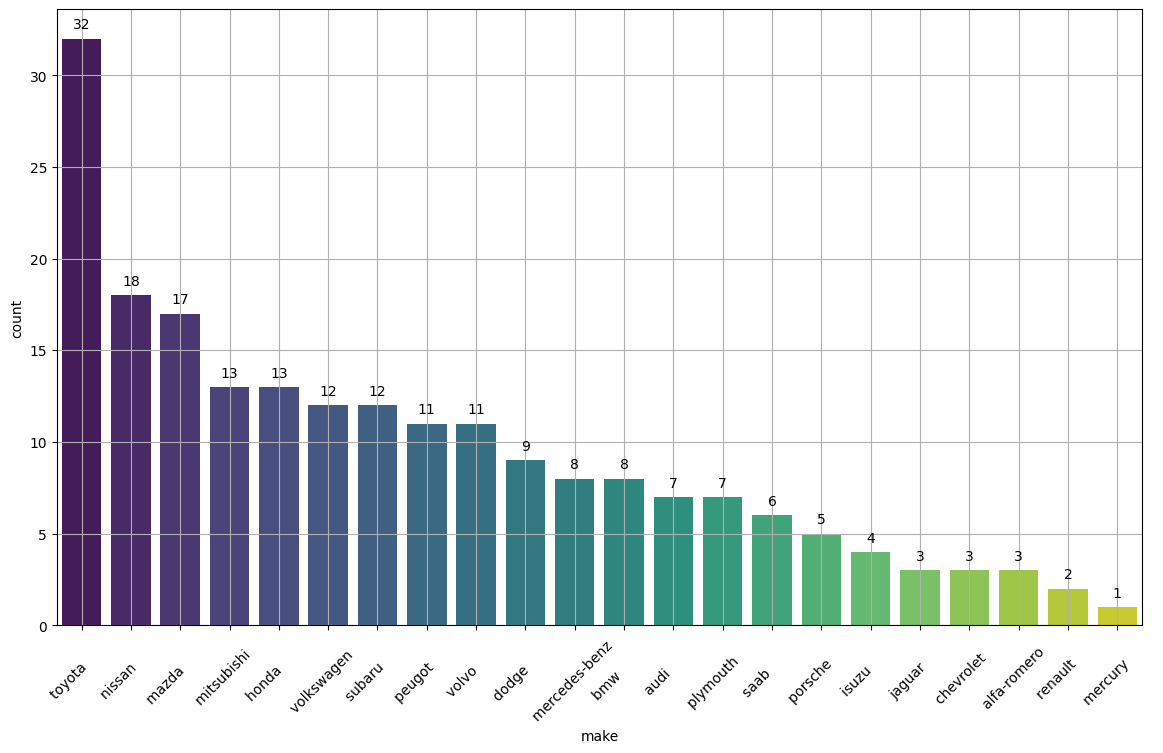

In [1751]:
plt.figure(figsize=(14, 8))
ax = sb.countplot(x='make', data=car_data_A, order=car_data_A['make'].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.grid()
plt.show()

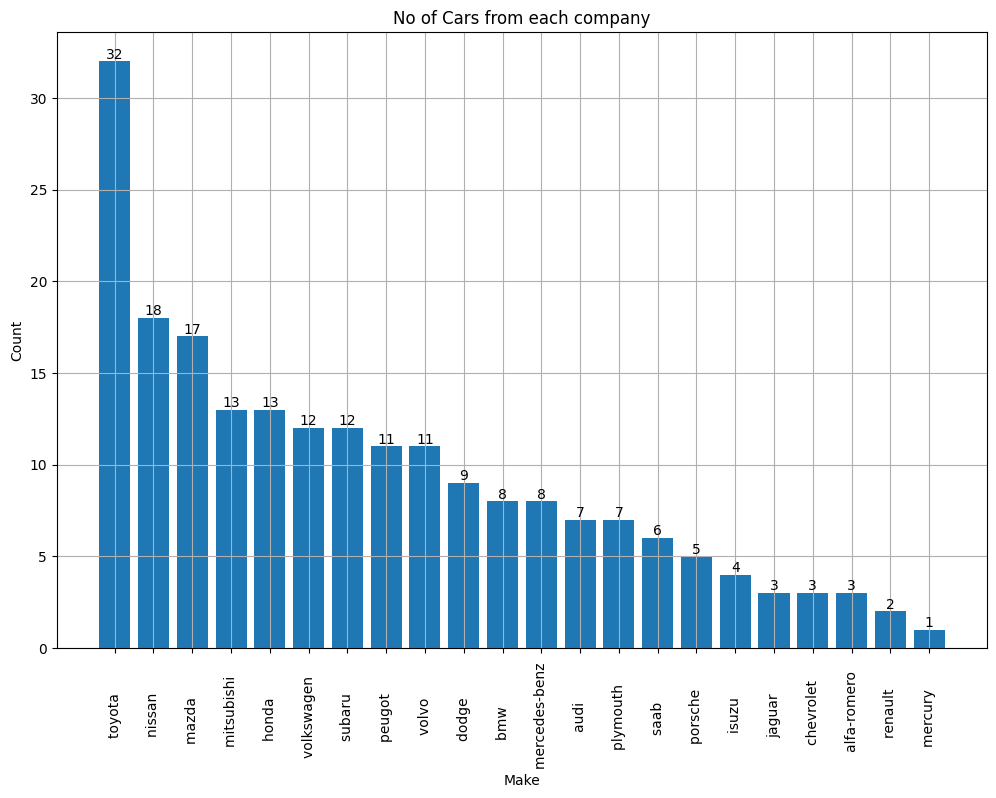

In [1752]:
make_counts = car_data_A['make'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
bars = plt.bar(make_counts.index, make_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('No of Cars from each company')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.grid()
plt.show()


In [1753]:
car_data_A['make'].unique()

array(['alfa-romero   ', 'audi          ', 'bmw           ',
       'chevrolet     ', 'dodge         ', 'honda         ',
       'isuzu         ', 'jaguar        ', 'mazda         ',
       'mercedes-benz ', 'mercury       ', 'mitsubishi    ',
       'nissan        ', 'peugot        ', 'plymouth      ',
       'porsche       ', 'renault       ', 'saab          ',
       'subaru        ', 'toyota        ', 'volkswagen    ',
       'volvo         '], dtype=object)

In [1754]:
car_data_A['make'] = car_data_A['make'].str.strip()

In [1755]:
car_data_A['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [1756]:
toyota = car_data_A.groupby('make').get_group('toyota')
toyota.head()

Unnamed: 0  symboling  normalized-losses    make   fuel-type   
150         150          1                 87  toyota  gas         \
151         151          1                 87  toyota  gas          
152         152          1                 74  toyota  gas          
153         153          0                 77  toyota  gas          
154         154          0                 81  toyota  gas          

      aspiration   num-of-doors    body-style   drive-wheels   
150  std          two            hatchback     fwd            \
151  std          two            hatchback     fwd             
152  std          four           hatchback     fwd             
153  std          four           wagon         fwd             
154  std          four           wagon         4wd             

      engine-location  wheel-base  length  width  height  curb-weight   
150  front                   95.7   158.7   63.6    54.5         1985  \
151  front                   95.7   158.7   63.6    54.5         2040   
152  front                   95.7   158.7   63.6    54.5         2015   
153  front                   95.7   169.7   63.6    59.1         2280   
154  front                   95.7   169.7   63.6    59.1         2290   

      engine-type   num-of-cylinders  engine-size   fuel-system  bore  stroke   
150  ohc           four                        92  2bbl          3.05    3.03  \
151  ohc           four                        92  2bbl          3.05    3.03   
152  ohc           four                        92  2bbl          3.05    3.03   
153  ohc           four                        92  2bbl          3.05    3.03   
154  ohc           four                        92  2bbl          3.05    3.03   

     compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  price  
150                9.0          62      4800        35           39   5348  
151                9.0          62      4800        31           38   6338  
152                9.0          62      4800        31           38   6488  
153                9.0          62      4800        31           37   6918  
154                9.0          62      4800        27           32   7898

<Axes: xlabel='fuel-type', ylabel='count'>

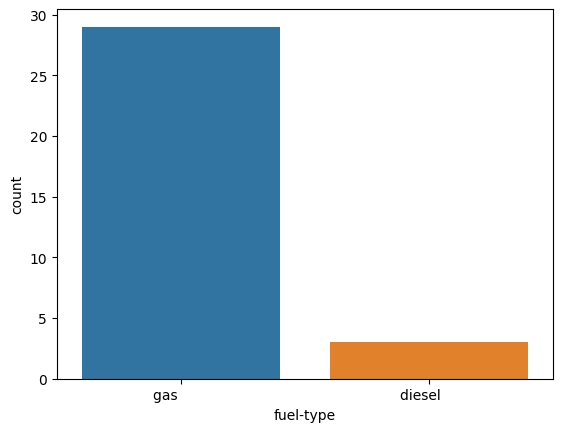

In [1757]:
sb.countplot(x = 'fuel-type', data=toyota)

- Which car has most two doors?

In [1758]:
car_data_A['num-of-doors'] = car_data_A['num-of-doors'].str.strip()

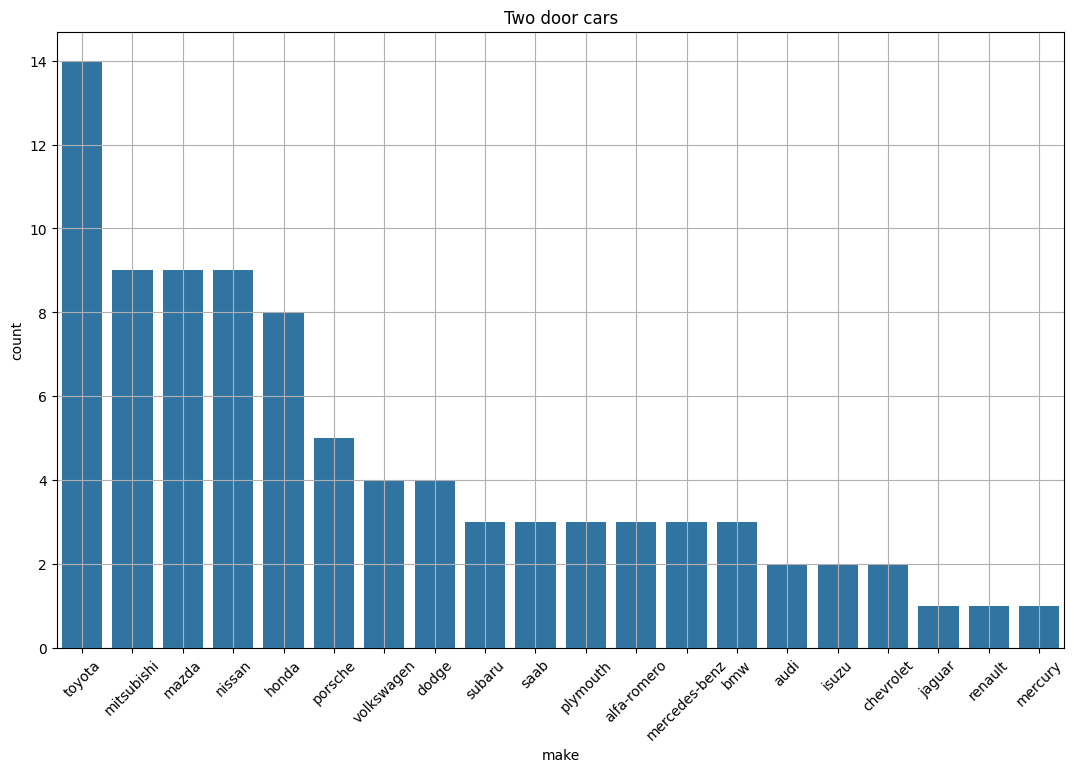

In [1759]:
plt.figure(figsize=(13, 8))
two_door = car_data_A.groupby('num-of-doors').get_group('two')
sb.countplot(x='make', data=two_door, order=two_door['make'].value_counts().index, color='#1f77b4')
plt.xticks(rotation=45)
plt.title('Two door cars')
plt.grid()
plt.show()

- Which car has most four doors?

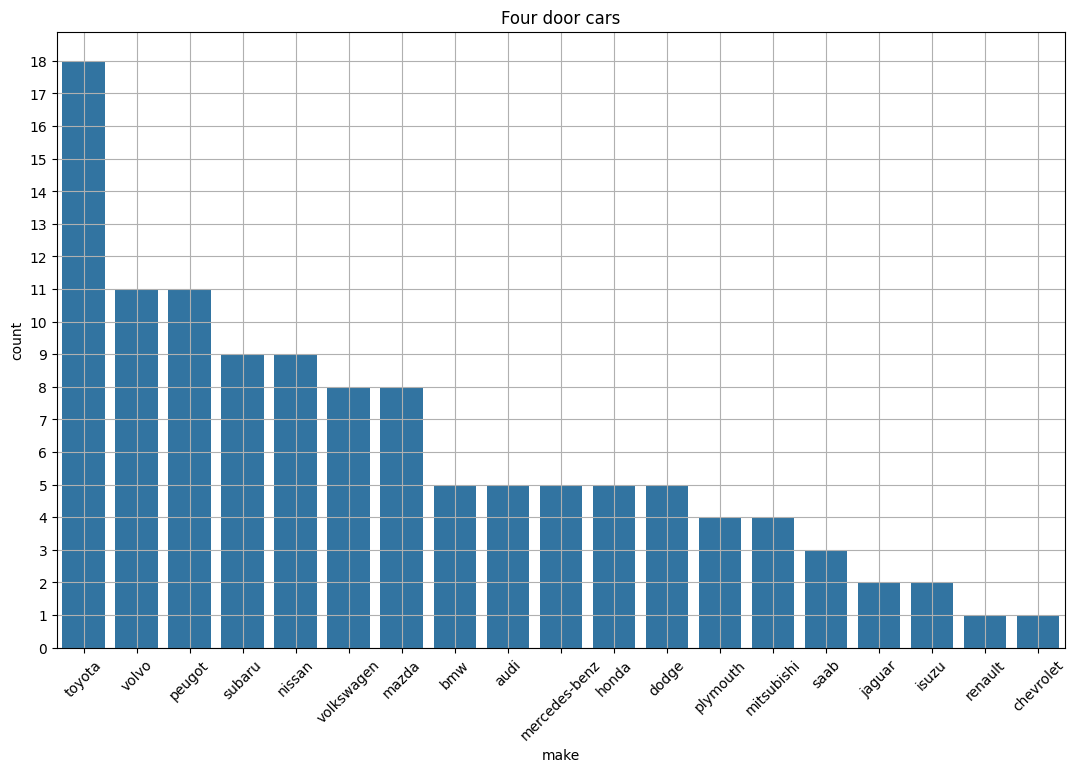

In [1760]:
plt.figure(figsize=(13, 8))
four_door = car_data_A.groupby('num-of-doors').get_group('four')
sb.countplot(x='make', data=four_door, order=four_door['make'].value_counts().index, color='#1f77b4')
plt.xticks(rotation=45)
plt.title('Four door cars')
plt.yticks(range(0, max(four_door['make'].value_counts())+1, 1))
plt.grid()
plt.show()

- Price distribution of each make?

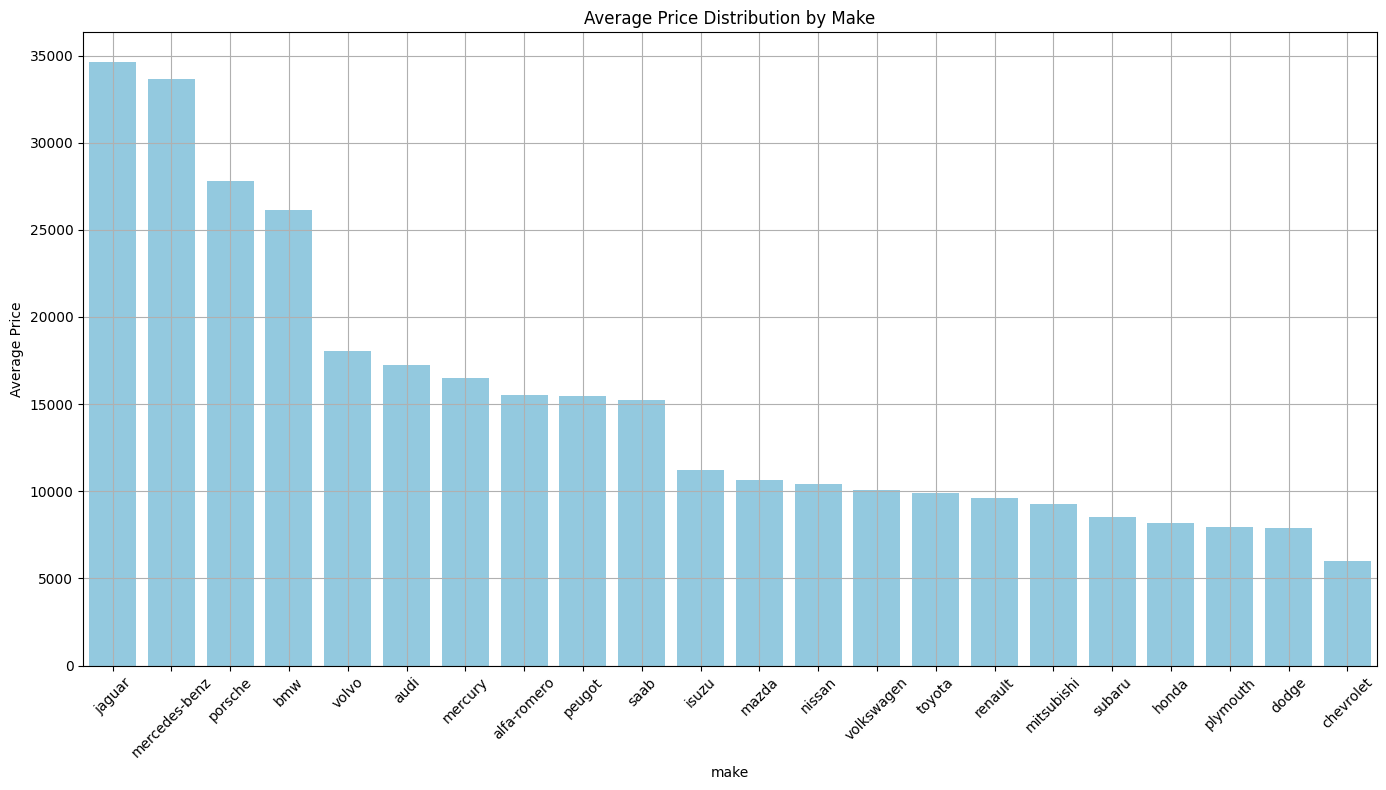

In [1761]:
plt.figure(figsize=(14, 8))
priceA = car_data_A[['make', 'price']].groupby('make').mean().round(2).reset_index().sort_values(by='price', ascending=False)
sb.barplot(x='make', y='price', data=priceA, order=priceA['make'], color='skyblue')
plt.grid()
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.title('Average Price Distribution by Make')
plt.tight_layout()

plt.show()


<h2>6. <u>Feature Engineering

In [1762]:
car_data_B = car_data_A.copy()

In [1763]:
## Removing the extra spaced in values
car_data_B['fuel-type'] = car_data_B['fuel-type'].str.strip()
car_data_B['aspiration'] = car_data_B['aspiration'].str.strip()
car_data_B['drive-wheels'] = car_data_B['drive-wheels'].str.strip()
car_data_B['engine-location'] = car_data_B['engine-location'].str.strip()
car_data_B['num-of-cylinders'] = car_data_B['num-of-cylinders'].str.strip()

In [1764]:
pd.set_option('display.max_columns', None)
car_data_B.head()

Unnamed: 0  symboling  normalized-losses         make fuel-type aspiration   
0           0          3                161  alfa-romero       gas        std  \
1           1          3                161  alfa-romero       gas        std   
2           2          1                161  alfa-romero       gas        std   
3           3          2                164         audi       gas        std   
4           4          2                164         audi       gas        std   

  num-of-doors    body-style drive-wheels engine-location  wheel-base  length   
0          two  convertible           rwd           front        88.6   168.8  \
1          two  convertible           rwd           front        88.6   168.8   
2          two  hatchback             rwd           front        94.5   171.2   
3         four  sedan                 fwd           front        99.8   176.6   
4         four  sedan                 4wd           front        99.4   176.6   

   width  height  curb-weight   engine-type num-of-cylinders  engine-size   
0   64.1    48.8         2548  dohc                     four          130  \
1   64.1    48.8         2548  dohc                     four          130   
2   65.5    52.4         2823  ohcv                      six          152   
3   66.2    54.3         2337  ohc                      four          109   
4   66.4    54.3         2824  ohc                      five          136   

    fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm   
0  mpfi          3.47    2.68                9.0         111      5000  \
1  mpfi          3.47    2.68                9.0         111      5000   
2  mpfi          2.68    3.47                9.0         154      5000   
3  mpfi          3.19    3.40               10.0         102      5500   
4  mpfi          3.19    3.40                8.0         115      5500   

   city-mpg  highway-mpg  price  
0        21           27  13495  
1        21           27  16500  
2        19           26  16500  
3        24           30  13950  
4        18           22  17450

In [1765]:
car_data_B['num-of-cylinders'] = car_data_B['num-of-cylinders'].replace(
    {
        'four':4,
        'six':6,
        'five':5,
        'eight':8,
        'two':2,
        'three':3,
        'twelve':12
    }
)

car_data_B['num-of-cylinders'] = car_data_B['num-of-cylinders'].astype(int)

In [1766]:
car_data_B.head()

Unnamed: 0  symboling  normalized-losses         make fuel-type aspiration   
0           0          3                161  alfa-romero       gas        std  \
1           1          3                161  alfa-romero       gas        std   
2           2          1                161  alfa-romero       gas        std   
3           3          2                164         audi       gas        std   
4           4          2                164         audi       gas        std   

  num-of-doors    body-style drive-wheels engine-location  wheel-base  length   
0          two  convertible           rwd           front        88.6   168.8  \
1          two  convertible           rwd           front        88.6   168.8   
2          two  hatchback             rwd           front        94.5   171.2   
3         four  sedan                 fwd           front        99.8   176.6   
4         four  sedan                 4wd           front        99.4   176.6   

   width  height  curb-weight   engine-type  num-of-cylinders  engine-size   
0   64.1    48.8         2548  dohc                         4          130  \
1   64.1    48.8         2548  dohc                         4          130   
2   65.5    52.4         2823  ohcv                         6          152   
3   66.2    54.3         2337  ohc                          4          109   
4   66.4    54.3         2824  ohc                          5          136   

    fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm   
0  mpfi          3.47    2.68                9.0         111      5000  \
1  mpfi          3.47    2.68                9.0         111      5000   
2  mpfi          2.68    3.47                9.0         154      5000   
3  mpfi          3.19    3.40               10.0         102      5500   
4  mpfi          3.19    3.40                8.0         115      5500   

   city-mpg  highway-mpg  price  
0        21           27  13495  
1        21           27  16500  
2        19           26  16500  
3        24           30  13950  
4        18           22  17450

## Outlier Detection

In [1767]:
numerical_df = car_data_B.select_dtypes(include=['int64', 'float64'])
# numerical_df = numerical_df.iloc[:, 1:-1]
numerical_df.head()

Unnamed: 0  symboling  normalized-losses  wheel-base  length  width   
0           0          3                161        88.6   168.8   64.1  \
1           1          3                161        88.6   168.8   64.1   
2           2          1                161        94.5   171.2   65.5   
3           3          2                164        99.8   176.6   66.2   
4           4          2                164        99.4   176.6   66.4   

   height  curb-weight  engine-size  bore  stroke  compression-ratio   
0    48.8         2548          130  3.47    2.68                9.0  \
1    48.8         2548          130  3.47    2.68                9.0   
2    52.4         2823          152  2.68    3.47                9.0   
3    54.3         2337          109  3.19    3.40               10.0   
4    54.3         2824          136  3.19    3.40                8.0   

   horsepower  peak-rpm  city-mpg  highway-mpg  price  
0         111      5000        21           27  13495  
1         111      5000        21           27  16500  
2         154      5000        19           26  16500  
3         102      5500        24           30  13950  
4         115      5500        18           22  17450

In [1768]:
numerical_df.shape

(205, 17)

<Axes: >

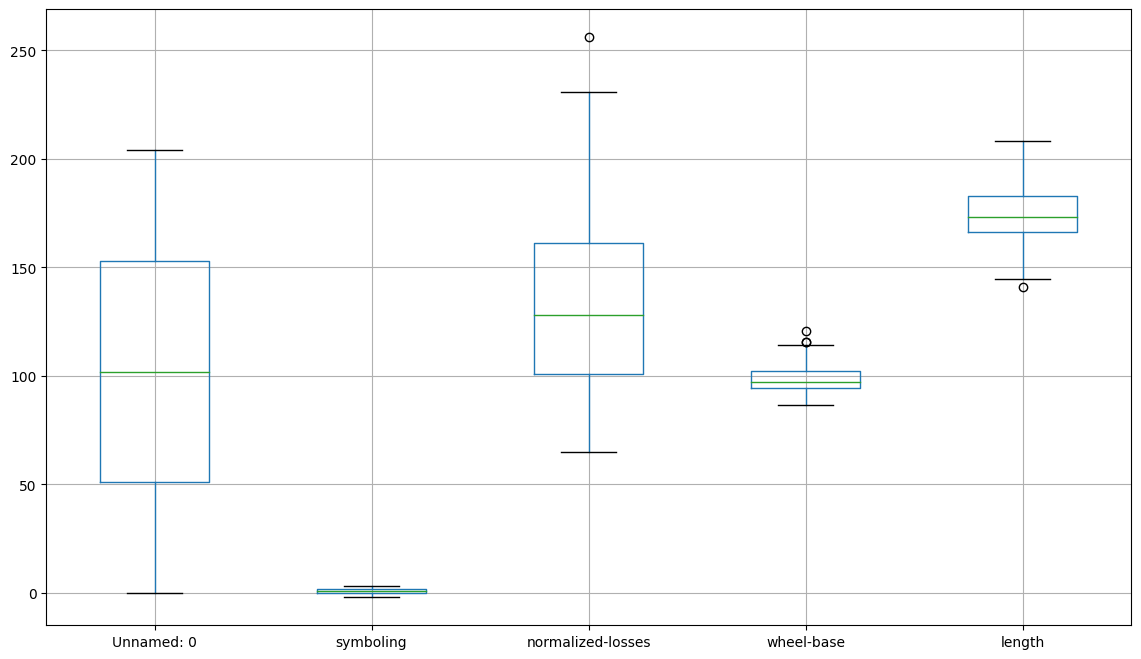

In [1769]:
plt.figure(figsize=(14, 8))
numerical_df.iloc[:, :5].boxplot()

<Axes: >

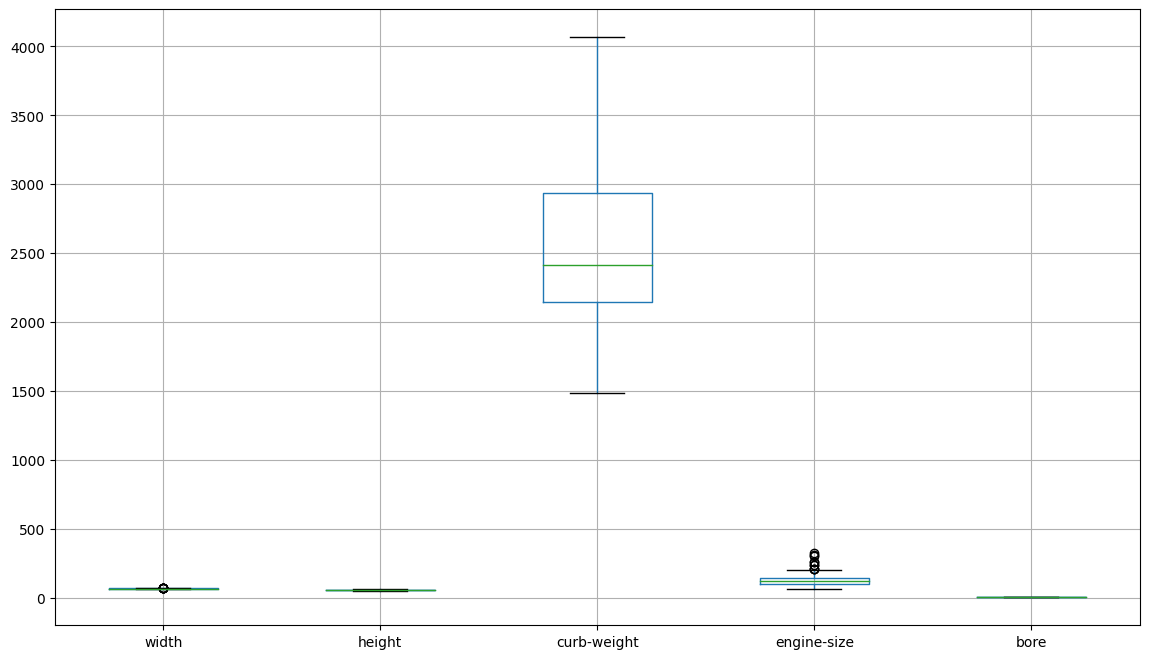

In [1770]:
plt.figure(figsize=(14, 8))
numerical_df.iloc[:, 5:10].boxplot()

<Axes: >

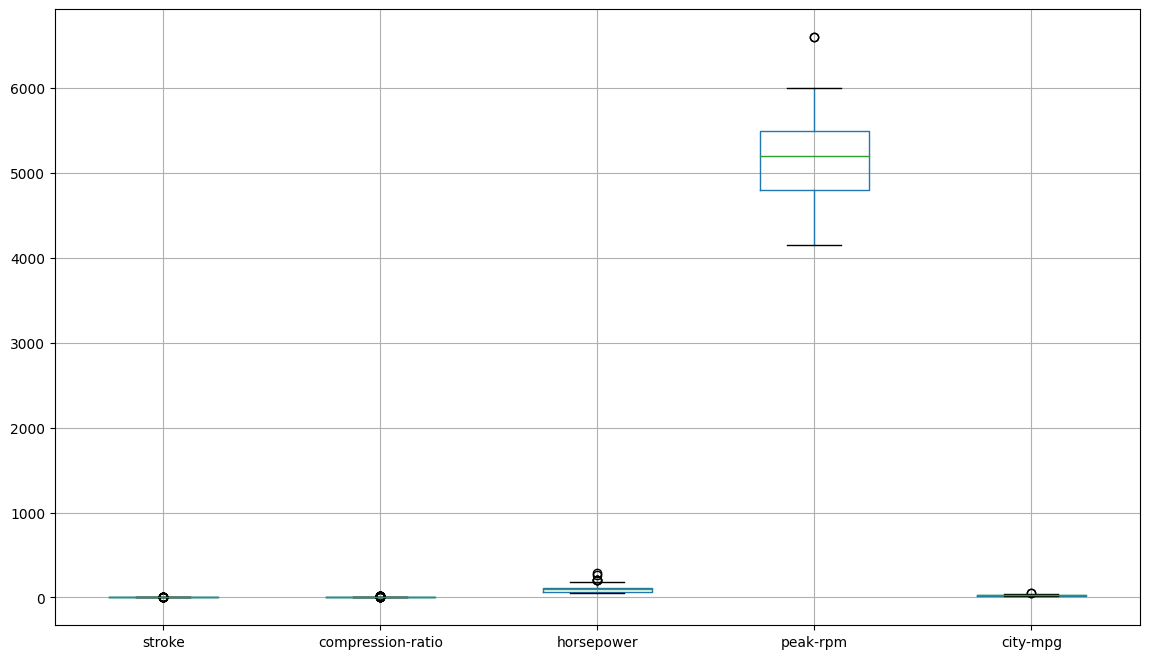

In [1771]:
plt.figure(figsize=(14, 8))
numerical_df.iloc[:, 10:15].boxplot()

<Axes: >

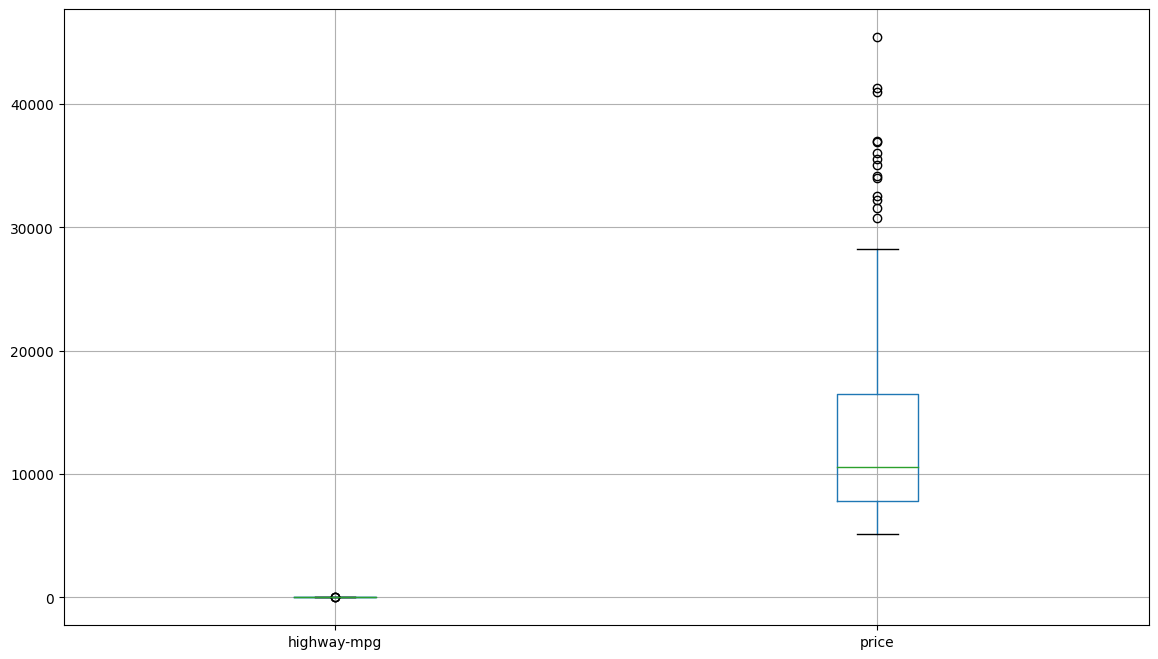

In [1772]:
plt.figure(figsize=(14, 8))
numerical_df.iloc[:, 15:].boxplot()

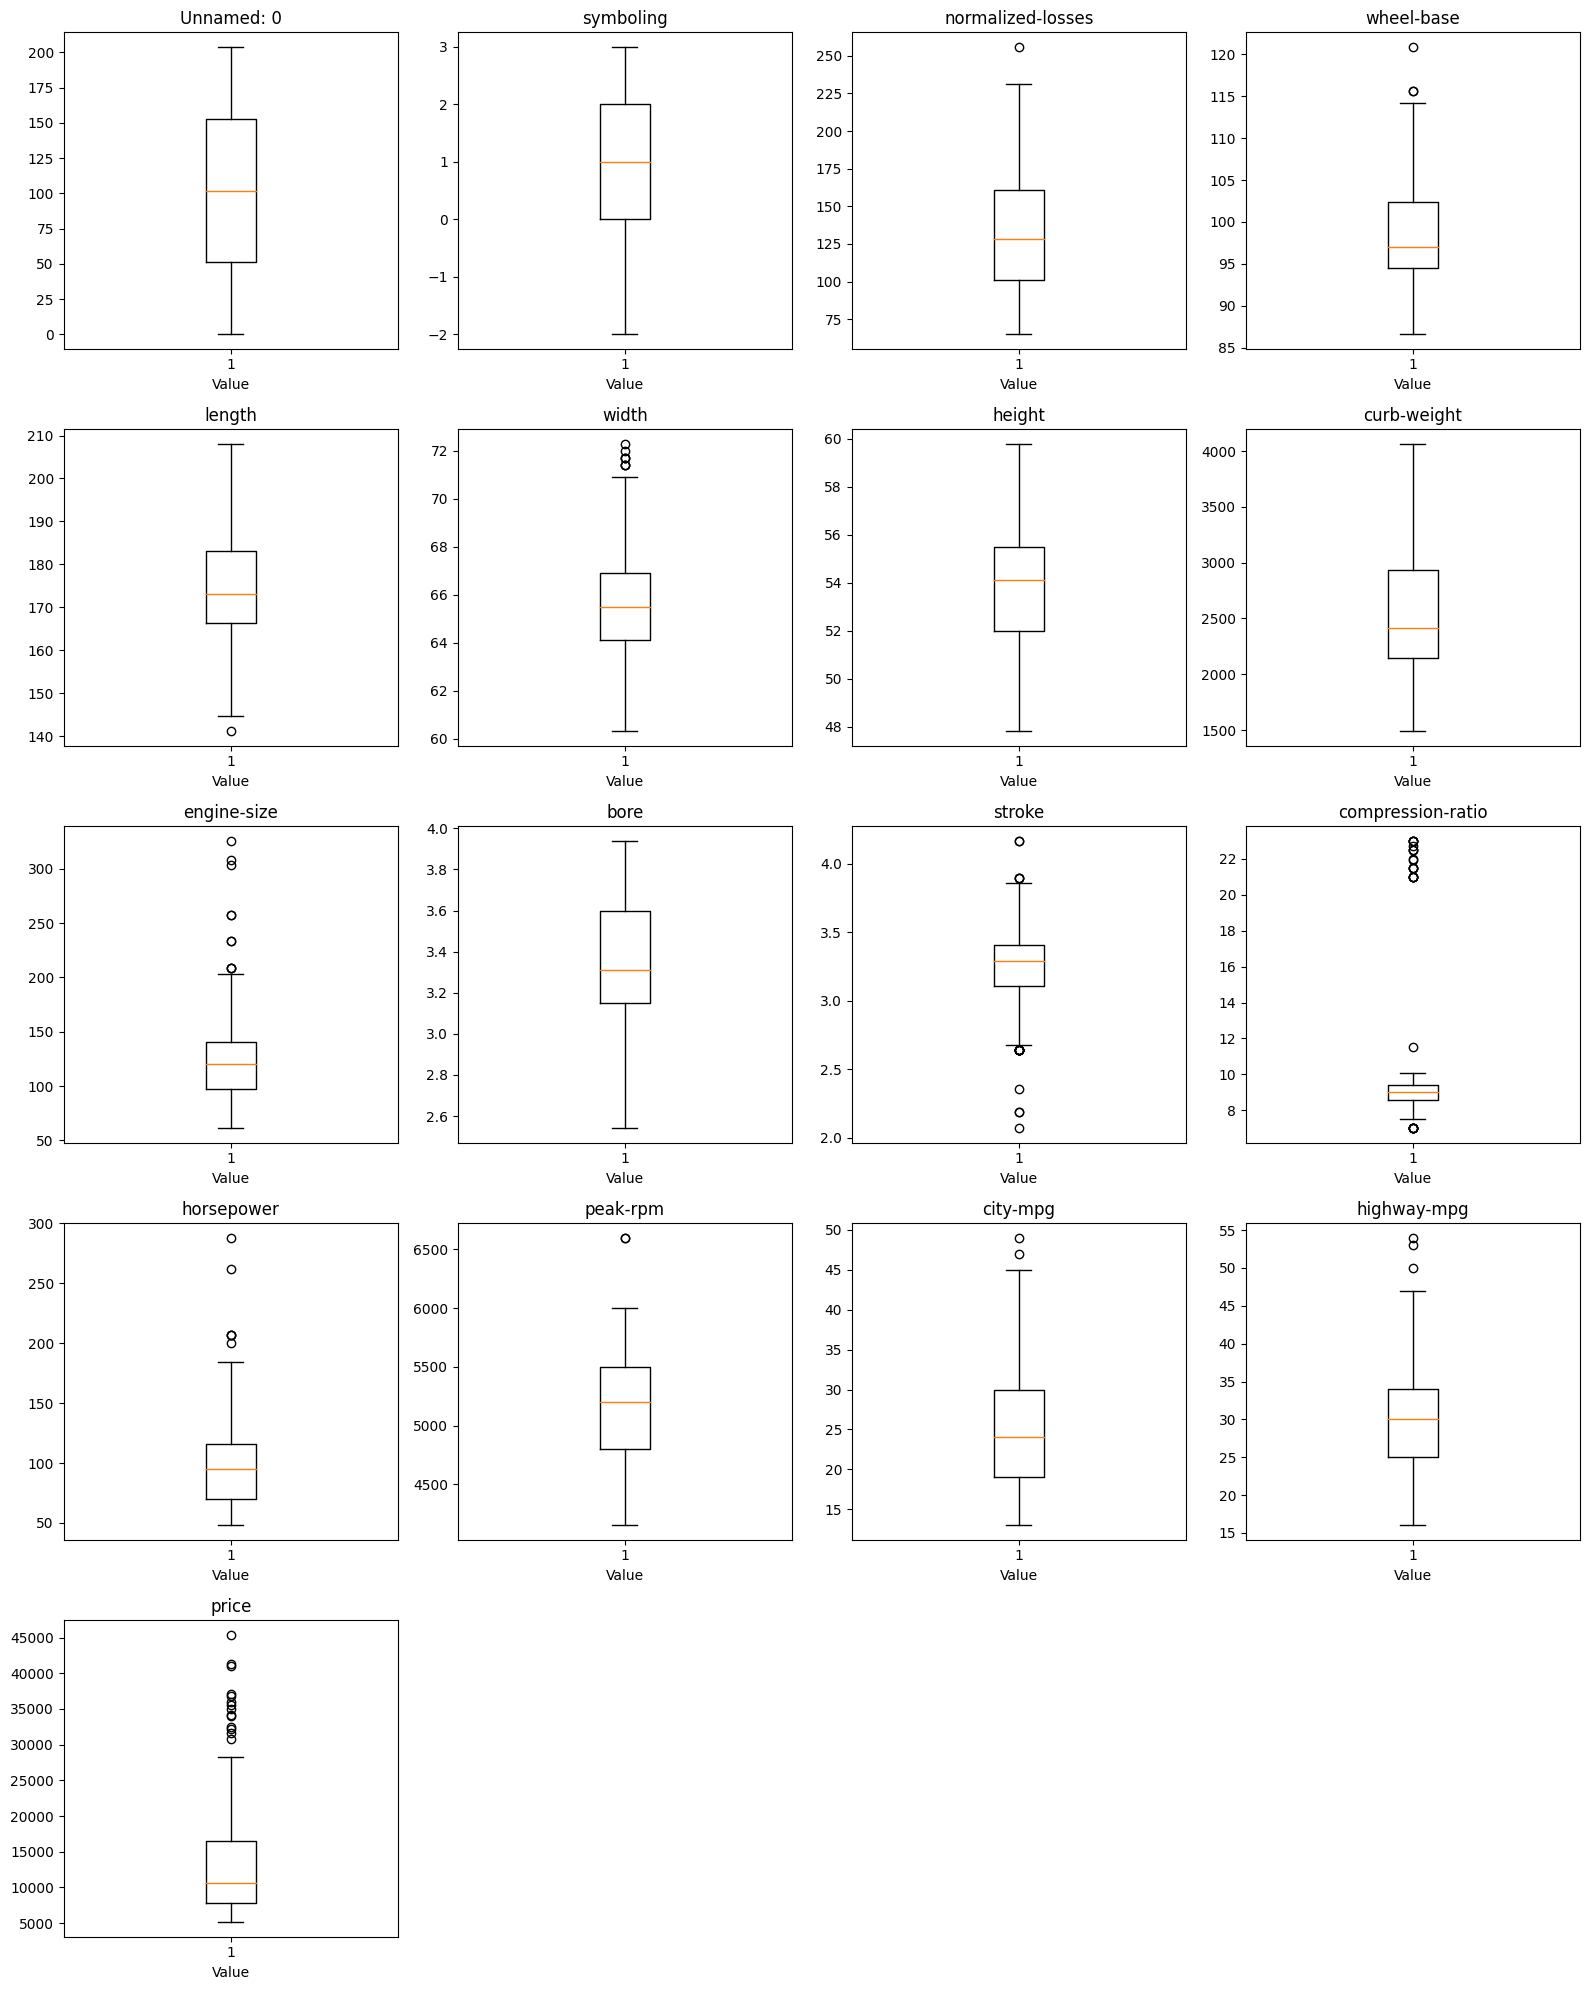

In [1773]:
import math

# Calculate the number of rows and columns for subplots
num_cols = len(numerical_df.columns)
num_rows = math.ceil(num_cols / 4)  # Adjust the number of columns per row as needed

# Set the figure size
plt.figure(figsize=(16, 4 * num_rows))

# Iterate through each numerical column
for i, column in enumerate(numerical_df.columns):
    # Create a new subplot for each column
    plt.subplot(num_rows, 4, i+1)
    
    # Plot the box plot for the current column
    plt.boxplot(numerical_df[column])
    
    # Set the title for the subplot
    plt.title(column)
    
    # Set labels for x and y axes
    plt.xlabel('Value')
    plt.ylabel('')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [1774]:
outl_cols = ['width', 'city-mpg', 'highway-mpg', 'stroke']

ot_rm_col = ['engine-size', 'horsepower']

for k in outl_cols:
    Q1 = car_data_B[k].quantile(0.25)
    Q3 = car_data_B[k].quantile(0.75)
    IQR = Q3 - Q1
    lower_extreme = Q1-1.5*IQR
    upper_extreme = Q3+1.5*IQR

    car_data_B.loc[ car_data_B[k] < lower_extreme, k] = car_data_B[k].mean()
    car_data_B.loc[ car_data_B[k] > upper_extreme, k] = car_data_B[k].mean()

# Iterate over each numerical column
for column in ot_rm_col:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = numerical_df[column].quantile(0.25)
    Q3 = numerical_df[column].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers by filtering the DataFrame
    car_data_B = car_data_B[(car_data_B[column] >= lower_bound) & (car_data_B[column] <= upper_bound)]


In [1775]:
car_data_B = car_data_B.drop(columns = ['compression-ratio'])

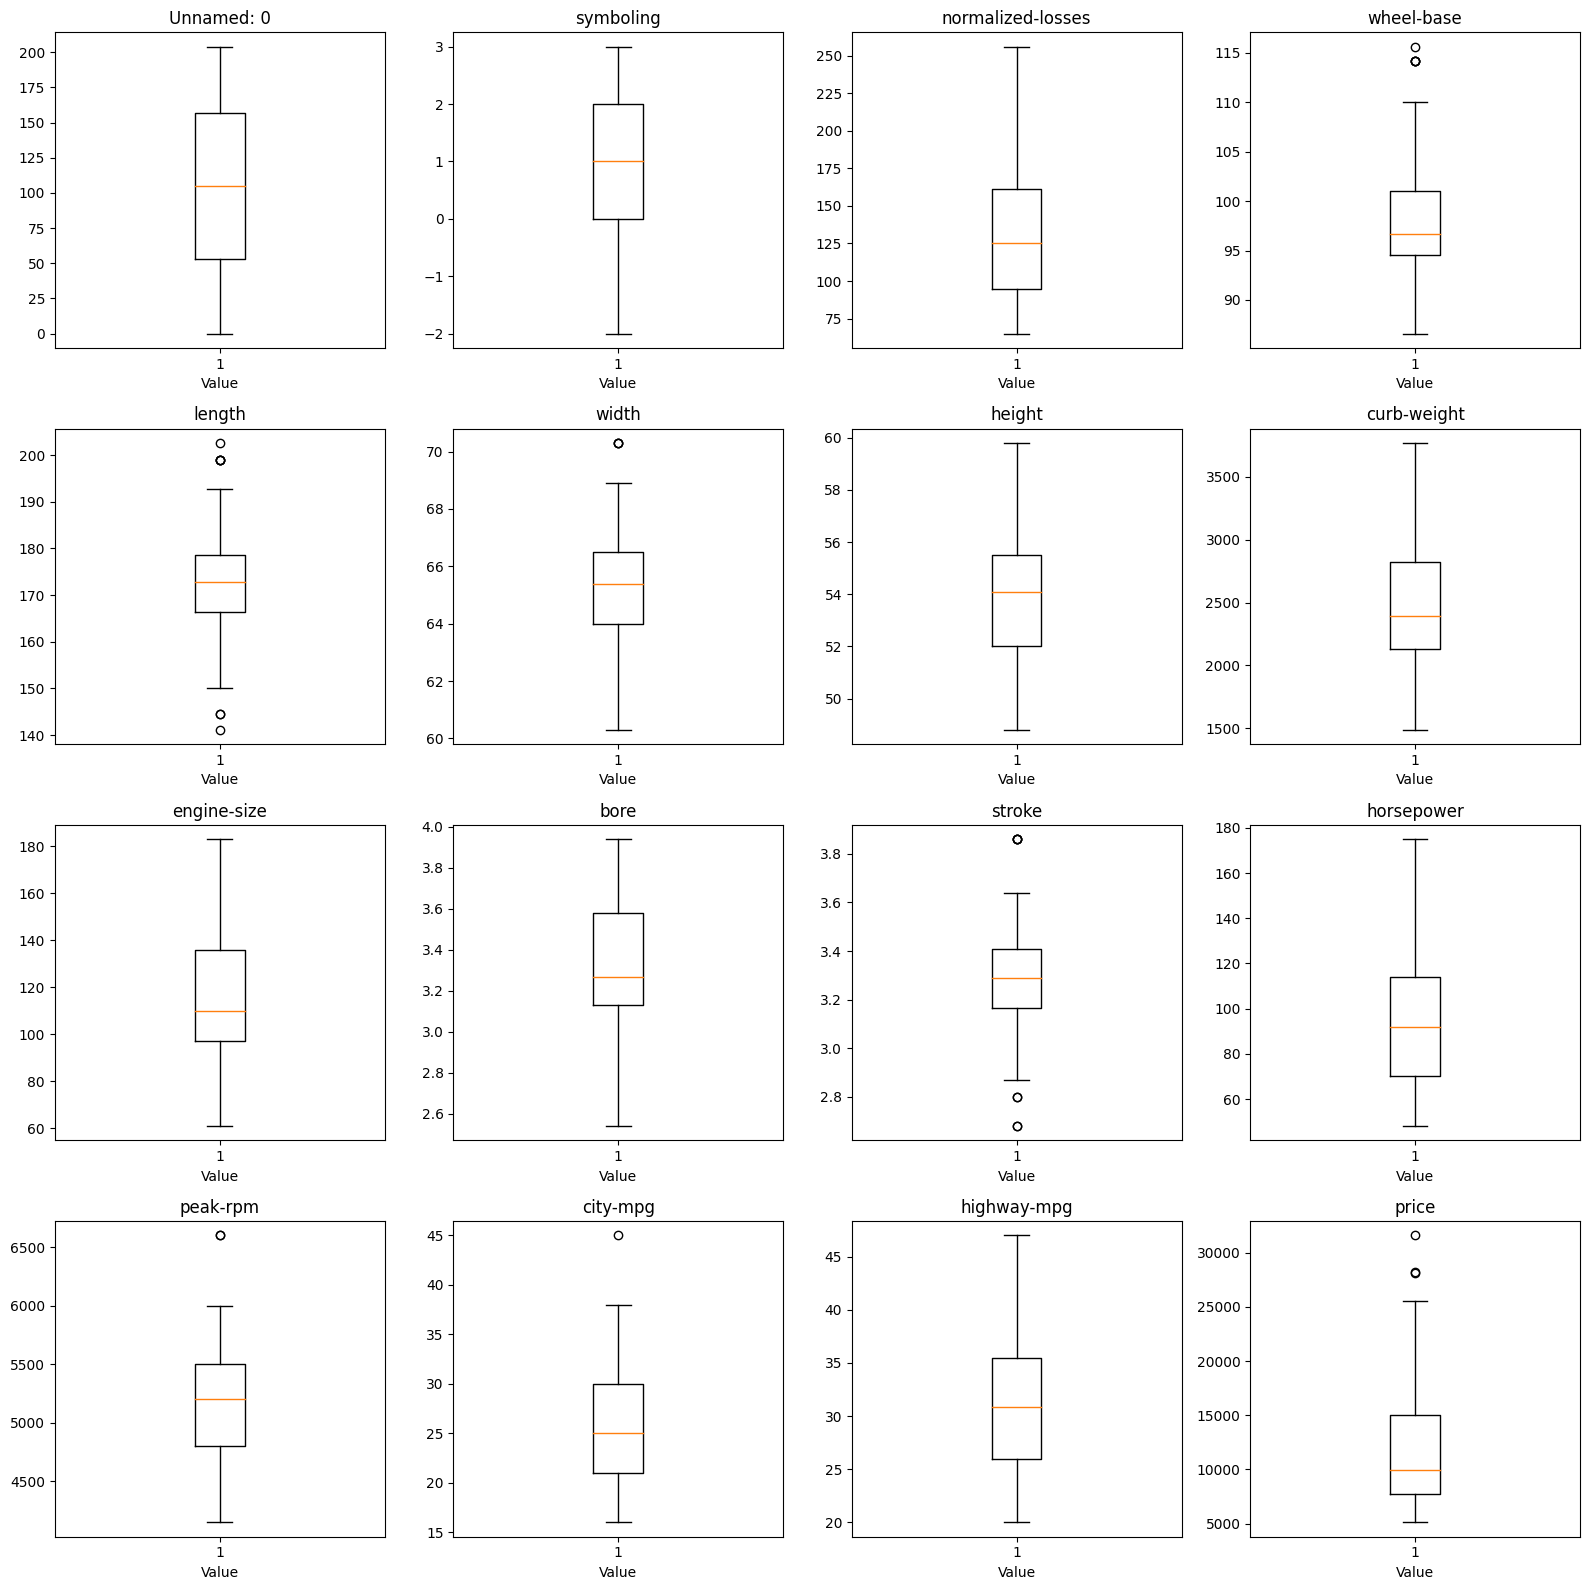

In [1776]:
import math
numerical_df = car_data_B.select_dtypes(include=['int64', 'float64'])
# Calculate the number of rows and columns for subplots
num_cols = len(numerical_df.columns)
num_rows = math.ceil(num_cols / 4)  # Adjust the number of columns per row as needed

# Set the figure size
plt.figure(figsize=(16, 4 * num_rows))

# Iterate through each numerical column
for i, column in enumerate(numerical_df.columns):
    # Create a new subplot for each column
    plt.subplot(num_rows, 4, i+1)
    
    # Plot the box plot for the current column
    plt.boxplot(numerical_df[column])
    
    # Set the title for the subplot
    plt.title(column)
    
    # Set labels for x and y axes
    plt.xlabel('Value')
    plt.ylabel('')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## Feature Creation

In [1777]:
car_data_B['Engine-Volume'] = car_data_B['bore'] * car_data_B['stroke'] * car_data_B['num-of-cylinders']
car_data_B['car-size'] = car_data_B['length'] * car_data_B['width'] * car_data_B['height']
car_data_B['Power-to-wight-ratio'] = car_data_B['horsepower'] / car_data_B['curb-weight']
car_data_B['fuel-efficiency'] = (car_data_B['city-mpg'] + car_data_B['highway-mpg']) / 2

In [1778]:
car_data_B = car_data_B.drop(columns = ['stroke'])

In [1779]:
def rem_out():
    Q1 = car_data_B['Engine-Volume'].quantile(0.25)
    Q3 = car_data_B['Engine-Volume'].quantile(0.75)
    IQR = Q3 - Q1
    lower_extreme = Q1-1.5*IQR
    upper_extreme = Q3+1.5*IQR
    
    car_data_B.loc[ car_data_B['Engine-Volume'] < lower_extreme, 'Engine-Volume'] = car_data_B['Engine-Volume'].mean()
    car_data_B.loc[ car_data_B['Engine-Volume'] > upper_extreme, 'Engine-Volume'] = car_data_B['Engine-Volume'].mean()

rem_out()

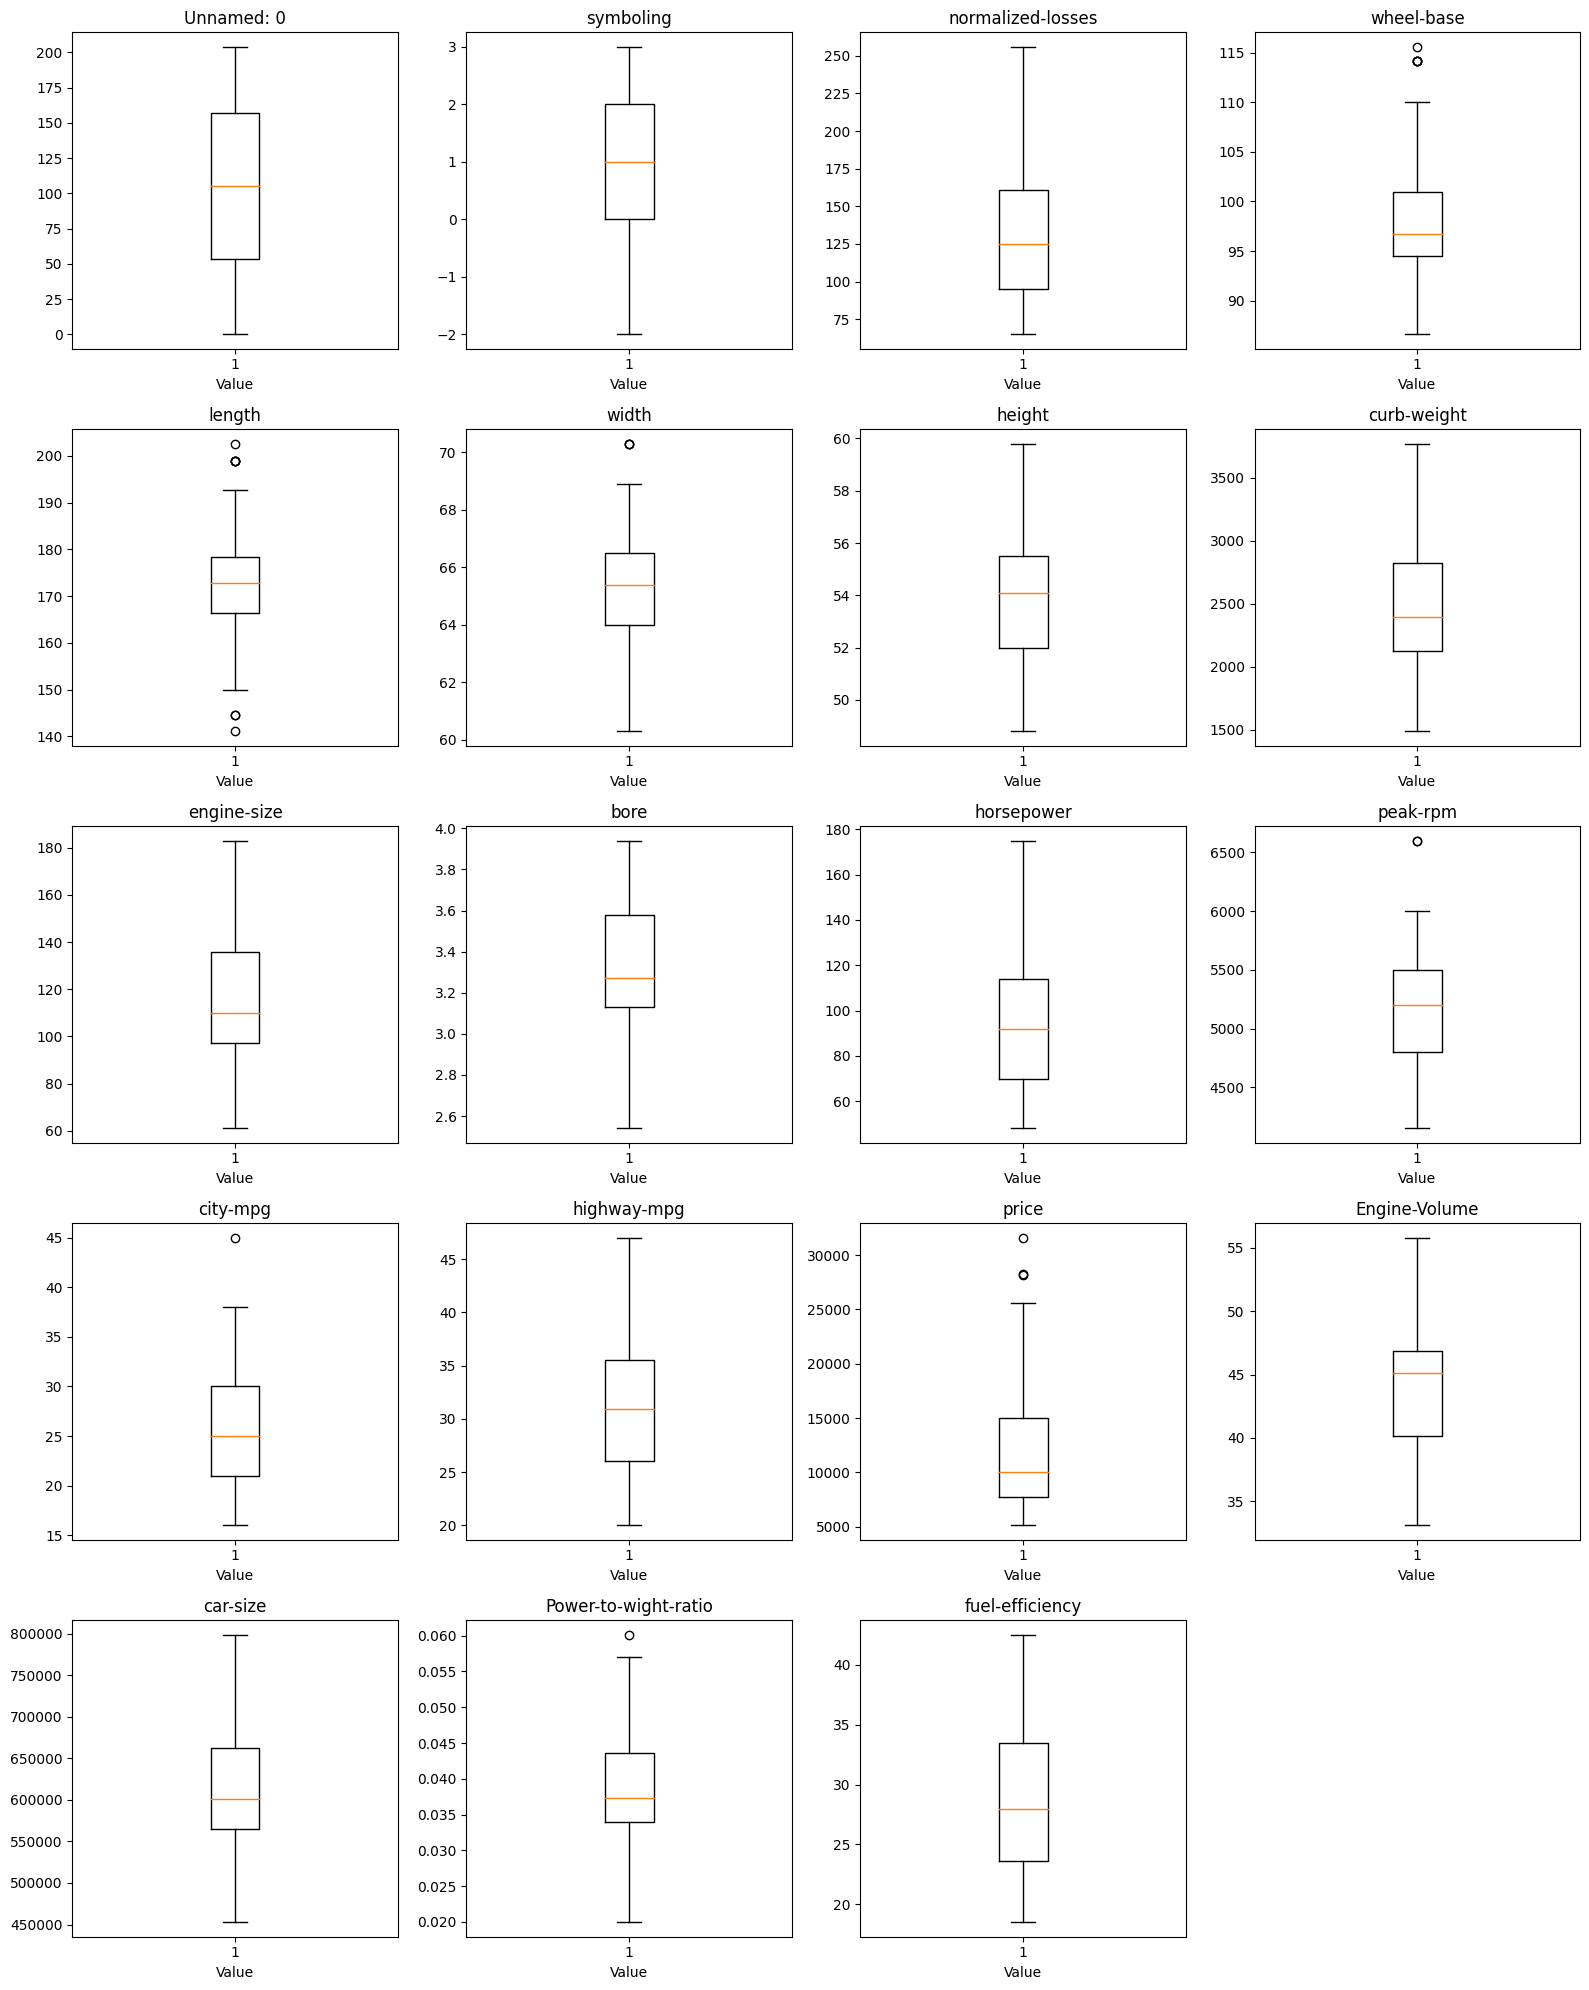

In [1780]:
import math
numerical_df = car_data_B.select_dtypes(include=['int64', 'float64'])
# Calculate the number of rows and columns for subplots
num_cols = len(numerical_df.columns)
num_rows = math.ceil(num_cols / 4)  # Adjust the number of columns per row as needed

# Set the figure size
plt.figure(figsize=(16, 4 * num_rows))

# Iterate through each numerical column
for i, column in enumerate(numerical_df.columns):
    # Create a new subplot for each column
    plt.subplot(num_rows, 4, i+1)
    
    # Plot the box plot for the current column
    plt.boxplot(numerical_df[column])
    
    # Set the title for the subplot
    plt.title(column)
    
    # Set labels for x and y axes
    plt.xlabel('Value')
    plt.ylabel('')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## Categorical Encoding

In [1781]:
categorical_df = car_data_B.select_dtypes(include=['O'])

for k in categorical_df.columns:
    print("\n-----------> ", k)
    print(categorical_df[k].value_counts())


----------->  make
make
toyota           32
nissan           17
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
audi              7
plymouth          7
saab              6
bmw               5
mercedes-benz     4
isuzu             4
chevrolet         3
alfa-romero       3
renault           2
mercury           1
porsche           1
Name: count, dtype: int64

----------->  fuel-type
fuel-type
gas       170
diesel     20
Name: count, dtype: int64

----------->  aspiration
aspiration
std      154
turbo     36
Name: count, dtype: int64

----------->  num-of-doors
num-of-doors
four    110
two      80
Name: count, dtype: int64

----------->  body-style
body-style
sedan           88
hatchback       68
wagon           25
hardtop          5
convertible      4
Name: count, dtype: int64

----------->  drive-wheels
drive-wheels
fwd    120
rwd     61
4wd      9
Name: count, dtype: int64

-

In [1782]:
car_data_C = car_data_B.copy()

* #### Label Encoding

In [1783]:
## label encoding
car_data_C['fuel-type'] = car_data_C['fuel-type'].replace({'diesel':0, 'gas':1})
car_data_C['aspiration'] =  car_data_C['aspiration'].replace({'turbo':0, 'std':1})
car_data_C['num-of-doors'] =  car_data_C['num-of-doors'].replace({'two':0, 'four':1})
car_data_C['drive-wheels'] = car_data_C['drive-wheels'].replace({'4wd':0, 'rwd':1, 'fwd':2})
car_data_C['engine-location'] = car_data_C['engine-location'].replace({'front':0, 'rear':1})
car_data_C.head()

Unnamed: 0  symboling  normalized-losses         make  fuel-type   
0           0          3                161  alfa-romero          1  \
1           1          3                161  alfa-romero          1   
2           2          1                161  alfa-romero          1   
3           3          2                164         audi          1   
4           4          2                164         audi          1   

   aspiration  num-of-doors    body-style  drive-wheels  engine-location   
0           1             0  convertible              1                0  \
1           1             0  convertible              1                0   
2           1             0  hatchback                1                0   
3           1             1  sedan                    2                0   
4           1             1  sedan                    0                0   

   wheel-base  length  width  height  curb-weight   engine-type   
0        88.6   168.8   64.1    48.8         2548  dohc          \
1        88.6   168.8   64.1    48.8         2548  dohc           
2        94.5   171.2   65.5    52.4         2823  ohcv           
3        99.8   176.6   66.2    54.3         2337  ohc            
4        99.4   176.6   66.4    54.3         2824  ohc            

   num-of-cylinders  engine-size   fuel-system  bore  horsepower  peak-rpm   
0                 4          130  mpfi          3.47         111      5000  \
1                 4          130  mpfi          3.47         111      5000   
2                 6          152  mpfi          2.68         154      5000   
3                 4          109  mpfi          3.19         102      5500   
4                 5          136  mpfi          3.19         115      5500   

   city-mpg  highway-mpg  price  Engine-Volume    car-size   
0      21.0         27.0  13495        37.1984  528019.904  \
1      21.0         27.0  16500        37.1984  528019.904   
2      19.0         26.0  16500        55.7976  587592.640   
3      24.0         30.0  13950        43.3840  634816.956   
4      18.0         22.0  17450        54.2300  636734.832   

   Power-to-wight-ratio  fuel-efficiency  
0              0.043564             24.0  
1              0.043564             24.0  
2              0.054552             22.5  
3              0.043646             27.0  
4              0.040722             20.0

In [1784]:
## Finding the Correlation of each attribute with target variable
pd.set_option('display.max_rows', None)
correl_data = car_data_C.select_dtypes(include=['int64', 'float64'])
corr_series = correl_data.corr()['price'].sort_values(ascending=False)
print(corr_series)

price                   1.000000
curb-weight             0.843772
engine-size             0.744741
length                  0.734226
width                   0.728805
wheel-base              0.702338
horsepower              0.696953
car-size                0.683792
bore                    0.493163
Engine-Volume           0.486340
Power-to-wight-ratio    0.325656
height                  0.280288
normalized-losses       0.237871
num-of-doors            0.165853
Unnamed: 0              0.005936
peak-rpm               -0.167207
symboling              -0.170588
fuel-type              -0.284729
aspiration             -0.424491
drive-wheels           -0.469574
city-mpg               -0.628920
fuel-efficiency        -0.652777
highway-mpg            -0.654986
engine-location              NaN
Name: price, dtype: float64


* ### One-hot Encoding

In [1785]:
car_data_D = car_data_C.copy()

In [1786]:
car_data_D.head()

Unnamed: 0  symboling  normalized-losses         make  fuel-type   
0           0          3                161  alfa-romero          1  \
1           1          3                161  alfa-romero          1   
2           2          1                161  alfa-romero          1   
3           3          2                164         audi          1   
4           4          2                164         audi          1   

   aspiration  num-of-doors    body-style  drive-wheels  engine-location   
0           1             0  convertible              1                0  \
1           1             0  convertible              1                0   
2           1             0  hatchback                1                0   
3           1             1  sedan                    2                0   
4           1             1  sedan                    0                0   

   wheel-base  length  width  height  curb-weight   engine-type   
0        88.6   168.8   64.1    48.8         2548  dohc          \
1        88.6   168.8   64.1    48.8         2548  dohc           
2        94.5   171.2   65.5    52.4         2823  ohcv           
3        99.8   176.6   66.2    54.3         2337  ohc            
4        99.4   176.6   66.4    54.3         2824  ohc            

   num-of-cylinders  engine-size   fuel-system  bore  horsepower  peak-rpm   
0                 4          130  mpfi          3.47         111      5000  \
1                 4          130  mpfi          3.47         111      5000   
2                 6          152  mpfi          2.68         154      5000   
3                 4          109  mpfi          3.19         102      5500   
4                 5          136  mpfi          3.19         115      5500   

   city-mpg  highway-mpg  price  Engine-Volume    car-size   
0      21.0         27.0  13495        37.1984  528019.904  \
1      21.0         27.0  16500        37.1984  528019.904   
2      19.0         26.0  16500        55.7976  587592.640   
3      24.0         30.0  13950        43.3840  634816.956   
4      18.0         22.0  17450        54.2300  636734.832   

   Power-to-wight-ratio  fuel-efficiency  
0              0.043564             24.0  
1              0.043564             24.0  
2              0.054552             22.5  
3              0.043646             27.0  
4              0.040722             20.0

In [1787]:
cols = ['make', 'body-style', 'engine-type', 'fuel-system']

car_data_D = pd.get_dummies(car_data_C, cols)
car_data_D = car_data_D.replace({True:1, False:0})

In [1788]:
car_data_D.columns = car_data_D.columns.str.strip()

In [1789]:
car_data_D.head()

Unnamed: 0  symboling  normalized-losses  fuel-type  aspiration   
0           0          3                161          1           1  \
1           1          3                161          1           1   
2           2          1                161          1           1   
3           3          2                164          1           1   
4           4          2                164          1           1   

   num-of-doors  drive-wheels  engine-location  wheel-base  length  width   
0             0             1                0        88.6   168.8   64.1  \
1             0             1                0        88.6   168.8   64.1   
2             0             1                0        94.5   171.2   65.5   
3             1             2                0        99.8   176.6   66.2   
4             1             0                0        99.4   176.6   66.4   

   height  curb-weight  num-of-cylinders  engine-size  bore  horsepower   
0    48.8         2548                 4          130  3.47         111  \
1    48.8         2548                 4          130  3.47         111   
2    52.4         2823                 6          152  2.68         154   
3    54.3         2337                 4          109  3.19         102   
4    54.3         2824                 5          136  3.19         115   

   peak-rpm  city-mpg  highway-mpg  price  Engine-Volume    car-size   
0      5000      21.0         27.0  13495        37.1984  528019.904  \
1      5000      21.0         27.0  16500        37.1984  528019.904   
2      5000      19.0         26.0  16500        55.7976  587592.640   
3      5500      24.0         30.0  13950        43.3840  634816.956   
4      5500      18.0         22.0  17450        54.2300  636734.832   

   Power-to-wight-ratio  fuel-efficiency  make_alfa-romero  make_audi   
0              0.043564             24.0                 1          0  \
1              0.043564             24.0                 1          0   
2              0.054552             22.5                 1          0   
3              0.043646             27.0                 0          1   
4              0.040722             20.0                 0          1   

   make_bmw  make_chevrolet  make_dodge  make_honda  make_isuzu  make_mazda   
0         0               0           0           0           0           0  \
1         0               0           0           0           0           0   
2         0               0           0           0           0           0   
3         0               0           0           0           0           0   
4         0               0           0           0           0           0   

   make_mercedes-benz  make_mercury  make_mitsubishi  make_nissan   
0                   0             0                0            0  \
1                   0             0                0            0   
2                   0             0                0            0   
3                   0             0                0            0   
4                   0             0                0            0   

   make_peugot  make_plymouth  make_porsche  make_renault  make_saab   
0            0              0             0             0          0  \
1            0              0             0             0          0   
2            0              0             0             0          0   
3            0              0             0             0          0   
4            0              0             0             0          0   

   make_subaru  make_toyota  make_volkswagen  make_volvo   
0            0            0                0           0  \
1            0            0                0           0   
2            0            0                0           0   
3            0            0                0           0   
4            0            0                0           0   

   body-style_convertible  body-style_hardtop  body-style_hatchback   
0                       1                

* ## SelectKbest

In [1790]:
X = car_data_D.copy()
X.drop(columns = ['price'], inplace=True)
y = car_data_D['price']

In [1791]:
selector = SelectKBest(score_func=f_regression, k=20)  # Select top 10 features based on F-test

# Fit SelectKBest on your data
selector.fit(X, y)

# Get the indices of the top 10 features
top_feature_indices = selector.get_support(indices=True)

# Subset your feature matrix to include only the top 10 features
X_selected = X.iloc[:, top_feature_indices]

In [1792]:
print("Indices of Top 15 Features:")
print(top_feature_indices)

Indices of Top 15 Features:
[ 4  6  8  9 10 12 13 14 15 16 18 19 20 21 22 23 32 44 57 61]


In [1793]:
top_features_names = X.columns[top_feature_indices]
print(top_features_names)

Index(['aspiration', 'drive-wheels', 'wheel-base', 'length', 'width',
       'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'horsepower',
       'city-mpg', 'highway-mpg', 'Engine-Volume', 'car-size',
       'Power-to-wight-ratio', 'fuel-efficiency', 'make_mercedes-benz',
       'make_volvo', 'fuel-system_2bbl', 'fuel-system_mpfi'],
      dtype='object')


In [1794]:
## Selecting the important features based on correlationabs

cols_to_select = ['aspiration', 'drive-wheels', 'wheel-base', 'length', 'width',
       'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'horsepower',
       'city-mpg', 'highway-mpg', 'Engine-Volume', 'car-size',
       'Power-to-wight-ratio', 'fuel-efficiency', 'make_mercedes-benz',
       'make_volvo', 'fuel-system_2bbl', 'fuel-system_mpfi']

In [1795]:
car_data_E = car_data_D[['aspiration', 'drive-wheels', 'wheel-base', 'length', 'width',
       'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'horsepower',
       'city-mpg', 'highway-mpg', 'Engine-Volume', 'car-size',
       'Power-to-wight-ratio', 'fuel-efficiency', 'make_mercedes-benz',
       'make_volvo', 'fuel-system_2bbl', 'fuel-system_mpfi', 'price']]
car_data_E.head()

aspiration  drive-wheels  wheel-base  length  width  curb-weight   
0           1             1        88.6   168.8   64.1         2548  \
1           1             1        88.6   168.8   64.1         2548   
2           1             1        94.5   171.2   65.5         2823   
3           1             2        99.8   176.6   66.2         2337   
4           1             0        99.4   176.6   66.4         2824   

   num-of-cylinders  engine-size  bore  horsepower  city-mpg  highway-mpg   
0                 4          130  3.47         111      21.0         27.0  \
1                 4          130  3.47         111      21.0         27.0   
2                 6          152  2.68         154      19.0         26.0   
3                 4          109  3.19         102      24.0         30.0   
4                 5          136  3.19         115      18.0         22.0   

   Engine-Volume    car-size  Power-to-wight-ratio  fuel-efficiency   
0        37.1984  528019.904              0.043564             24.0  \
1        37.1984  528019.904              0.043564             24.0   
2        55.7976  587592.640              0.054552             22.5   
3        43.3840  634816.956              0.043646             27.0   
4        54.2300  636734.832              0.040722             20.0   

   make_mercedes-benz  make_volvo  fuel-system_2bbl  fuel-system_mpfi  price  
0                   0           0                 0                 1  13495  
1                   0           0                 0                 1  16500  
2                   0           0                 0                 1  16500  
3                   0           0                 0                 1  13950  
4                   0           0                 0                 1  17450

In [1796]:
car_data_E.corr()['price'].sort_values(ascending=False)

price                   1.000000
curb-weight             0.843772
engine-size             0.744741
length                  0.734226
width                   0.728805
wheel-base              0.702338
horsepower              0.696953
car-size                0.683792
bore                    0.493163
Engine-Volume           0.486340
make_mercedes-benz      0.482156
fuel-system_mpfi        0.471047
num-of-cylinders        0.452040
Power-to-wight-ratio    0.325656
make_volvo              0.313752
aspiration             -0.424491
drive-wheels           -0.469574
fuel-system_2bbl       -0.568419
city-mpg               -0.628920
fuel-efficiency        -0.652777
highway-mpg            -0.654986
Name: price, dtype: float64

# Predictive modelling

* ### Choosing Dependenet Independent Variables

In [1797]:
X = car_data_E.iloc[:, :-1]
y = car_data_E['price']

In [1798]:
print(X.shape)
print(y.shape)

(190, 20)
(190,)


* ### Checking For Significance

In [1799]:
est = sm.OLS(y, X)
res = est.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              280.0
Date:                Wed, 21 Feb 2024   Prob (F-statistic):                   4.06e-118
Time:                        01:01:12   Log-Likelihood:                         -1735.0
No. Observations:                 190   AIC:                                      3508.
Df Residuals:                     171   BIC:                                      3570.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [1800]:
car_data_E.corr()['price'].sort_values(ascending=False)

price                   1.000000
curb-weight             0.843772
engine-size             0.744741
length                  0.734226
width                   0.728805
wheel-base              0.702338
horsepower              0.696953
car-size                0.683792
bore                    0.493163
Engine-Volume           0.486340
make_mercedes-benz      0.482156
fuel-system_mpfi        0.471047
num-of-cylinders        0.452040
Power-to-wight-ratio    0.325656
make_volvo              0.313752
aspiration             -0.424491
drive-wheels           -0.469574
fuel-system_2bbl       -0.568419
city-mpg               -0.628920
fuel-efficiency        -0.652777
highway-mpg            -0.654986
Name: price, dtype: float64

* ### Checking for multicollinearity

In [1801]:
def find_vif(xv):
    vif = pd.DataFrame()
    vif['variable'] = xv.columns
    vif['vif'] = [variance_inflation_factor(xv.values, i) for i in range(xv.shape[1])]
    return vif

car-size                0.683792
bore                    0.493163
Engine-Volume           0.486340
make_mercedes-benz      0.482156
fuel-system_mpfi        0.471047
num-of-cylinders        0.452040
Power-to-wight-ratio    0.325656
make_volvo              0.313752
aspiration             -0.424491
drive-wheels           -0.469574
fuel-system_2bbl       -0.568419

In [1802]:
xx = X.copy()

In [1803]:
xx = xx.drop(columns = ['car-size', 'Engine-Volume', 'bore', 'num-of-cylinders', 
                        'Power-to-wight-ratio'])

In [1804]:
find_vif(xx)

variable          vif
0           aspiration    10.581187
1         drive-wheels    16.235228
2           wheel-base  1960.675296
3               length  1895.183558
4                width  1679.178947
5          curb-weight   528.475850
6          engine-size   108.100622
7           horsepower    71.585931
8             city-mpg          inf
9          highway-mpg          inf
10     fuel-efficiency          inf
11  make_mercedes-benz     1.494754
12          make_volvo     1.291515
13    fuel-system_2bbl     3.755997
14    fuel-system_mpfi     5.422528

In [1805]:
X = xx.copy()

In [1806]:
X.columns

Index(['aspiration', 'drive-wheels', 'wheel-base', 'length', 'width',
       'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg',
       'fuel-efficiency', 'make_mercedes-benz', 'make_volvo',
       'fuel-system_2bbl', 'fuel-system_mpfi'],
      dtype='object')

> These variables are highly correlated but we will keep them due to certain reasons

* ### Train-Test Split

In [1807]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(142, 15)
(48, 15)
(142,)
(48,)


In [1808]:
X.head()

aspiration  drive-wheels  wheel-base  length  width  curb-weight   
0           1             1        88.6   168.8   64.1         2548  \
1           1             1        88.6   168.8   64.1         2548   
2           1             1        94.5   171.2   65.5         2823   
3           1             2        99.8   176.6   66.2         2337   
4           1             0        99.4   176.6   66.4         2824   

   engine-size  horsepower  city-mpg  highway-mpg  fuel-efficiency   
0          130         111      21.0         27.0             24.0  \
1          130         111      21.0         27.0             24.0   
2          152         154      19.0         26.0             22.5   
3          109         102      24.0         30.0             27.0   
4          136         115      18.0         22.0             20.0   

   make_mercedes-benz  make_volvo  fuel-system_2bbl  fuel-system_mpfi  
0                   0           0                 0                 1  
1                   0           0                 0                 1  
2                   0           0                 0                 1  
3                   0           0                 0                 1  
4                   0           0                 0                 1

In [1809]:

# cols_for_trans = ['wheel-base', 'length', 'width','curb-weight', 'engine-size', 'bore', 'horsepower', 'city-mpg', 'highway-mpg',
#                'Engine-Volume', 'car-size', 'fuel-efficiency']

# X_train_log = X_train.copy()
# X_test_log = X_test.copy()

# for k in cols_for_trans:
#     X_train_log[k] = np.log1p(X_train_log[k])
#     X_test_log[k] = np.log1p(X_test_log[k])

In [1810]:
cols_for_trans = ['aspiration', 'drive-wheels', 'wheel-base', 'length', 'width',
       'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg',
       'fuel-efficiency', 'make_mercedes-benz', 'make_volvo',
       'fuel-system_2bbl', 'fuel-system_mpfi']

cols_for_scl = ['wheel-base', 'length', 'width',
       'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg',
       'fuel-efficiency']

 # Assumptions Of Linear Regression

* ### Linearity

In [1811]:
X_log = X.copy()
X_log[cols_for_scl] = np.log1p(X_log[cols_for_scl])

In [1812]:
X_log.head()

aspiration  drive-wheels  wheel-base    length     width  curb-weight   
0           1             1    4.495355  5.134621  4.175925     7.843456  \
1           1             1    4.495355  5.134621  4.175925     7.843456   
2           1             1    4.559126  5.148657  4.197202     7.945910   
3           1             2    4.613138  5.179534  4.207673     7.757051   
4           1             0    4.609162  5.179534  4.210645     7.946264   

   engine-size  horsepower  city-mpg  highway-mpg  fuel-efficiency   
0     4.875197    4.718499  3.091042     3.332205         3.218876  \
1     4.875197    4.718499  3.091042     3.332205         3.218876   
2     5.030438    5.043425  2.995732     3.295837         3.157000   
3     4.700480    4.634729  3.218876     3.433987         3.332205   
4     4.919981    4.753590  2.944439     3.135494         3.044522   

   make_mercedes-benz  make_volvo  fuel-system_2bbl  fuel-system_mpfi  
0                   0           0                 0                 1  
1                   0           0                 0                 1  
2                   0           0                 0                 1  
3                   0           0                 0                 1  
4                   0           0                 0                 1

In [1813]:
X_scaled = X.copy()

scaler = MinMaxScaler()

# Apply scaling and normalization to specific columns
X_scaled[cols_for_scl] = scaler.fit_transform(X_scaled[cols_for_scl])

In [1814]:
X_scaled.head()

aspiration  drive-wheels  wheel-base    length  width  curb-weight   
0           1             1    0.068966  0.450407   0.38     0.464505  \
1           1             1    0.068966  0.450407   0.38     0.464505   
2           1             1    0.272414  0.489431   0.52     0.585013   
3           1             2    0.455172  0.577236   0.59     0.372042   
4           1             0    0.441379  0.577236   0.61     0.585451   

   engine-size  horsepower  city-mpg  highway-mpg  fuel-efficiency   
0     0.565574    0.496063  0.172414     0.259259         0.229167  \
1     0.565574    0.496063  0.172414     0.259259         0.229167   
2     0.745902    0.834646  0.103448     0.222222         0.166667   
3     0.393443    0.425197  0.275862     0.370370         0.354167   
4     0.614754    0.527559  0.068966     0.074074         0.062500   

   make_mercedes-benz  make_volvo  fuel-system_2bbl  fuel-system_mpfi  
0                   0           0                 0                 1  
1                   0           0                 0                 1  
2                   0           0                 0                 1  
3                   0           0                 0                 1  
4                   0           0                 0                 1

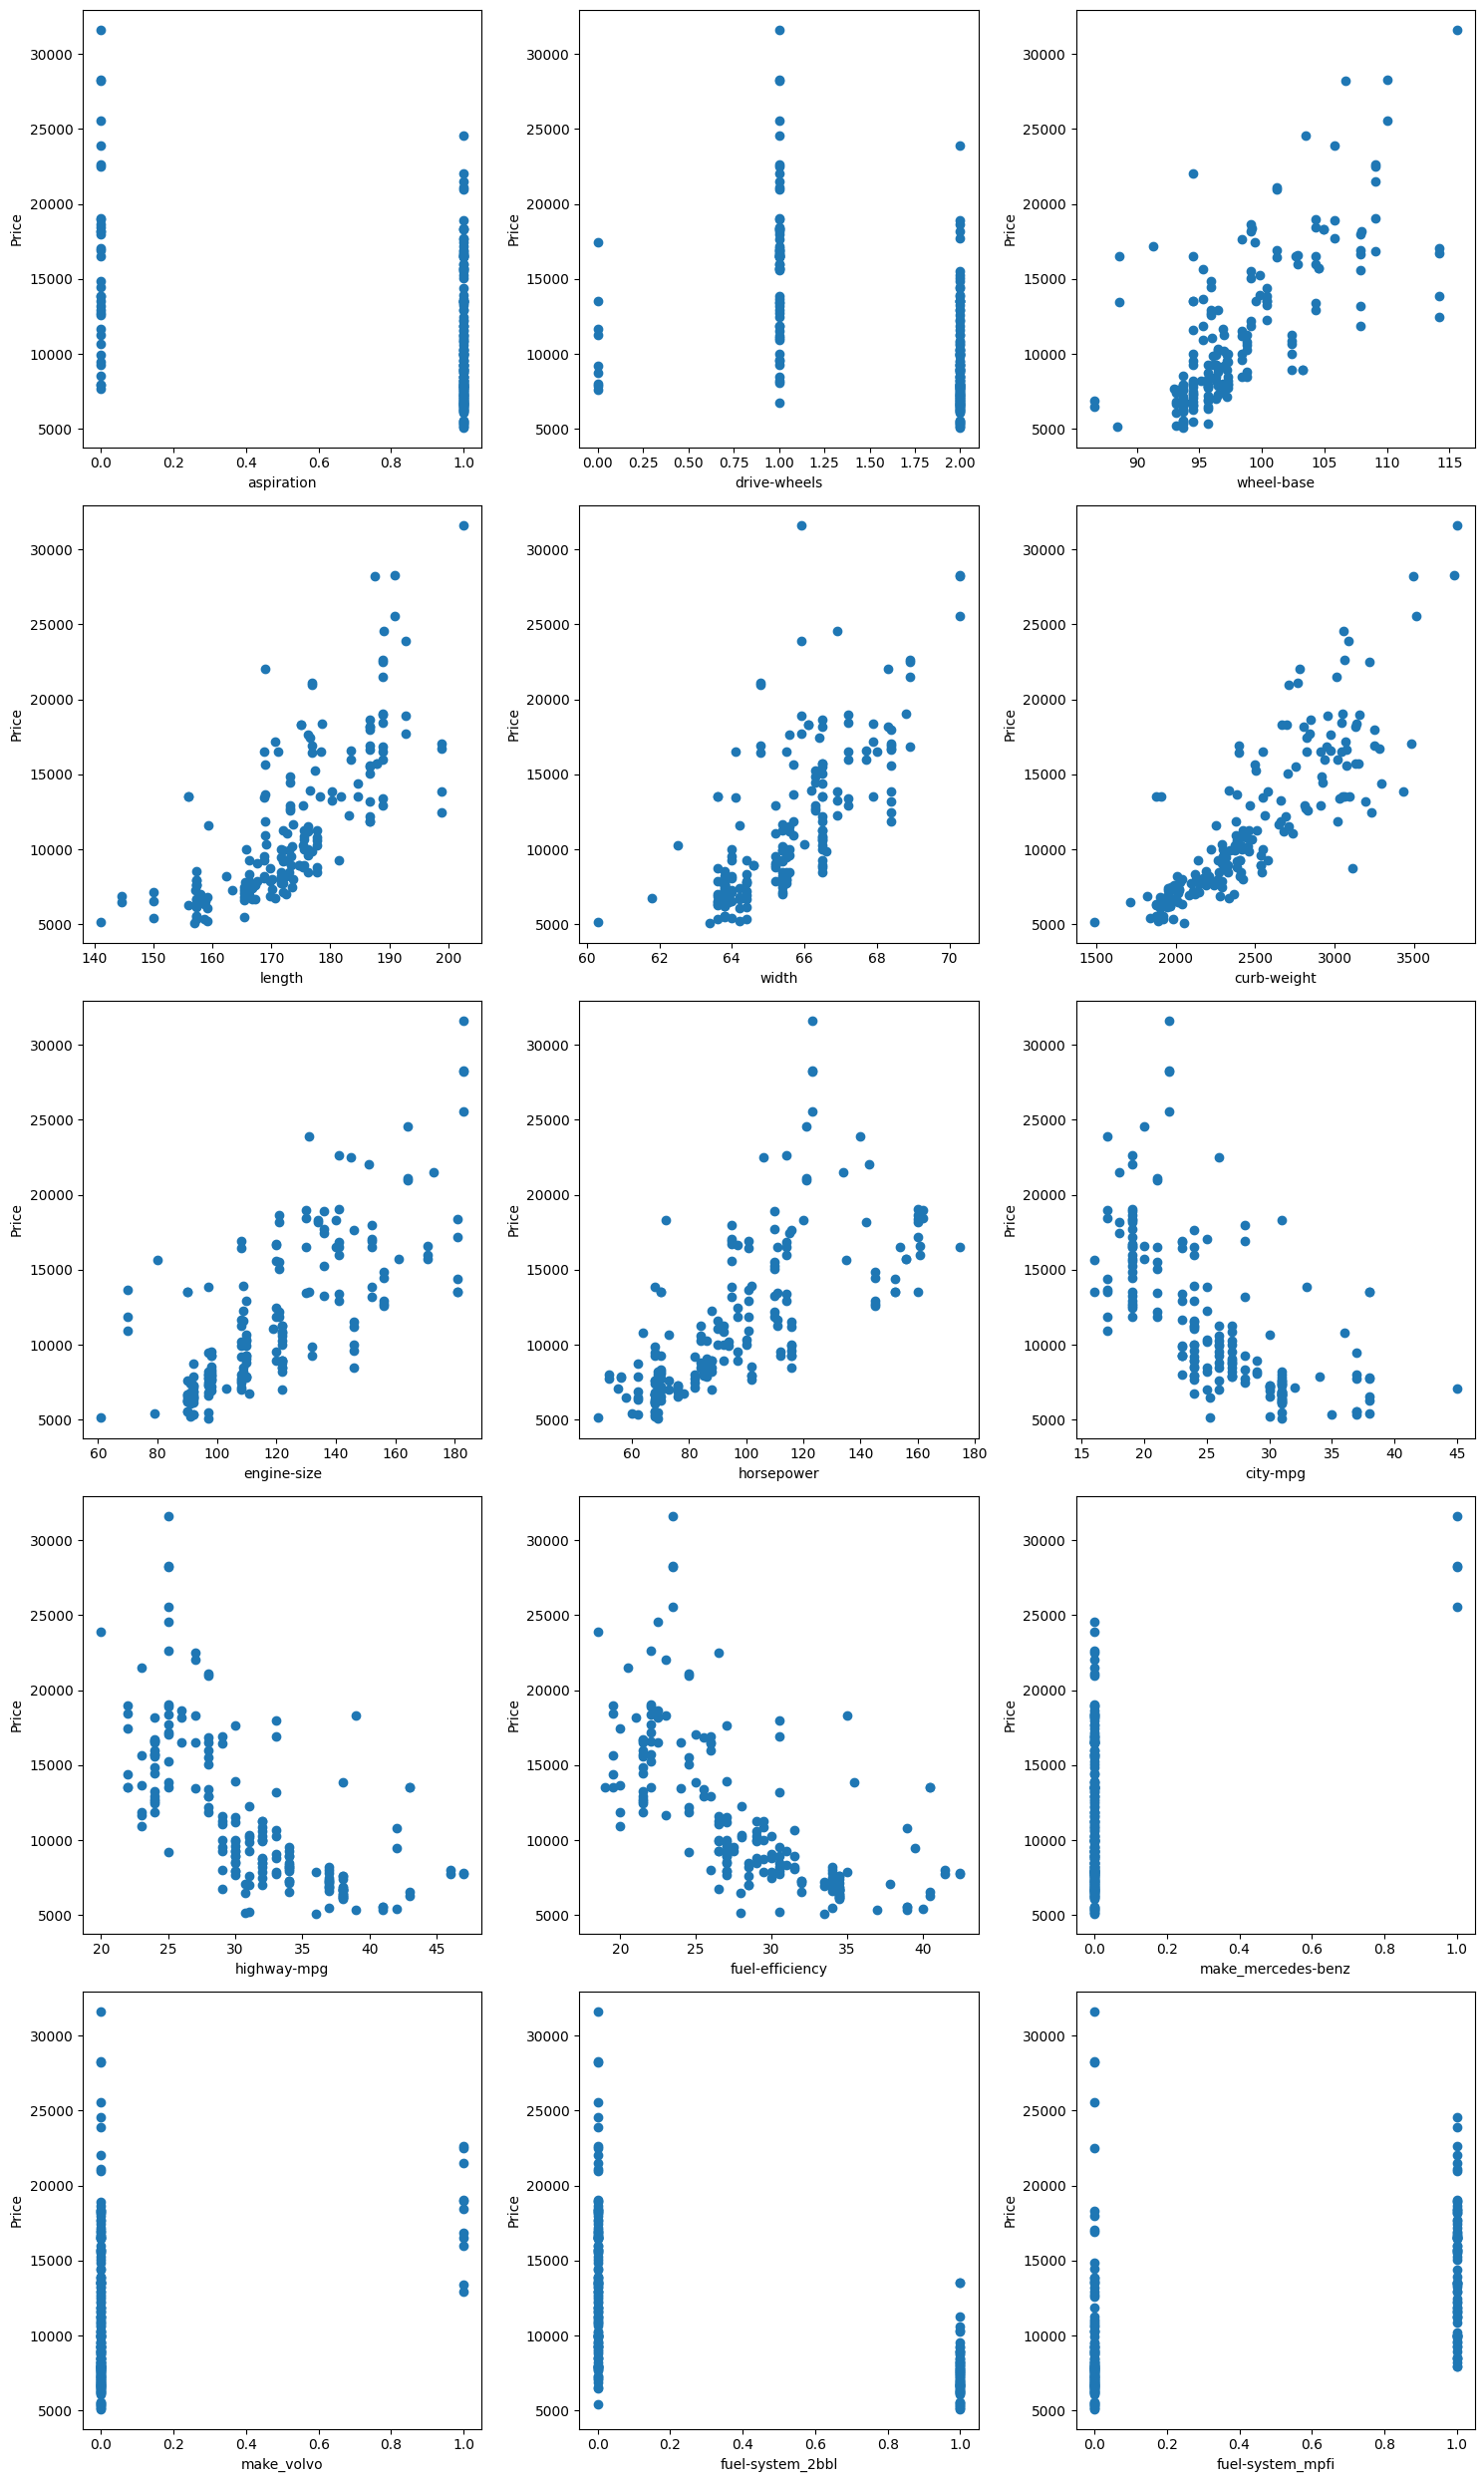

In [1815]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'X' contains independent variables and 'y' contains the dependent variable

# Calculate the number of rows needed
num_rows = len(X.columns) // 3 + (len(X.columns) % 3 > 0)

# Create subplots with three graphs per row
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Plot scatter plots for each independent variable against the dependent variable
for i, column in enumerate(X.columns):
    axes[i].scatter(X[column], y)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Price')

# Remove any unused axes
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


> Here, only the categorical encoded varaibles have non-linear relation.

* ### Independence of Residuals

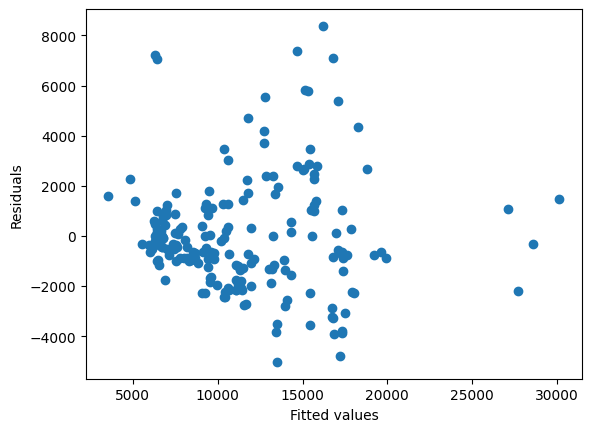

In [1816]:
model = sm.OLS(y, sm.add_constant(X)).fit()
residuals = model.resid
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

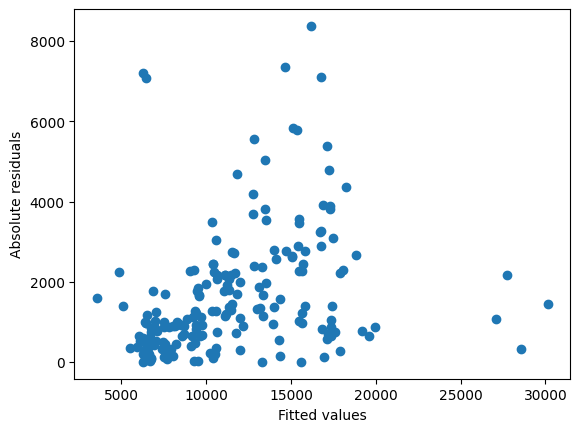

In [1817]:
plt.scatter(model.fittedvalues, abs(residuals))
plt.xlabel('Fitted values')
plt.ylabel('Absolute residuals')
plt.show()

> It is violating asssumption as it is heteroscedestic

## Model Training

In [1820]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print(cv_scores)
# Print average cross-validation score
print("Average Cross-Validation R-squared:", np.mean(cv_scores))

[0.44084144 0.59321056 0.53646842 0.51552732 0.2743868 ]
Average Cross-Validation R-squared: 0.4720869078634973


In [1821]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data and transform the selected columns
X_train[cols_for_scl] = scaler.fit_transform(X_train[cols_for_scl])

# Transform the testing data using the same scaler and selected columns
X_test[cols_for_scl] = scaler.transform(X_test[cols_for_scl])

model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

In [1822]:
final = pd.DataFrame({'Actual':y_test.values.flatten(), 'Predicted':y_test_pred.flatten()})
final.head()

Actual     Predicted
0   11850  13066.747611
1   28176  25671.250094
2    8358   7627.602287
3    8499   9339.537740
4    5399   6335.995634

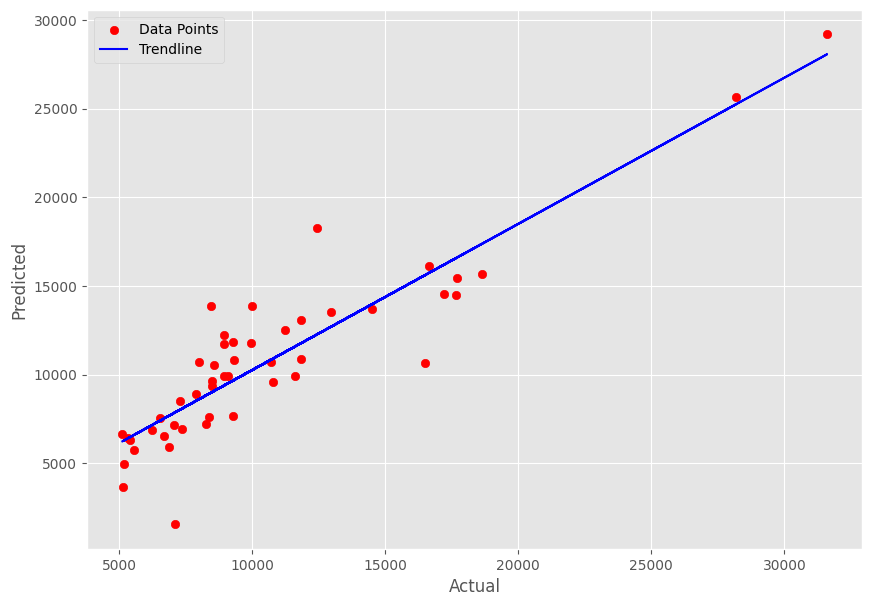

In [1823]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 7))

x = final['Actual']
y = final['Predicted']

coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]

plt.scatter(x, y, label='Data Points', color='red')

plt.plot(x, slope * x + intercept, label='Trendline', color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Model Evaluation

* #### mean absolute error

In [1824]:
mae = metrics.mean_absolute_error(y_test, y_test_pred)
print("Test Mean Absolute Error is : ", mae)

mae = metrics.mean_absolute_error(y_train, y_train_pred)
print("Train Mean Absolute Error is : ", mae)

Test Mean Absolute Error is :  1780.3411124040224
Train Mean Absolute Error is :  1714.9418985868158


* #### Mean Squared Error

In [1825]:
msee = metrics.mean_squared_error(y_test, y_test_pred)
print("Test Mean Squared Error is : ", msee)

mser = metrics.mean_squared_error(y_train, y_train_pred)
print("Train Mean Squared Error is : ", mser)

Test Mean Squared Error is :  5365841.205372752
Train Mean Squared Error is :  5547983.11054062


* #### Root Mean Squared Error

In [1826]:
test_rmse = np.sqrt(msee)
print("Test Root Mean Squared Error is : ", rmse)

train_rmse = np.sqrt(mser)
print("Train Root Mean Squared Error is : ", rmse)

Test Root Mean Squared Error is :  2176.4723197103285
Train Root Mean Squared Error is :  2176.4723197103285


* #### r2 Square

In [1827]:
r2 = metrics.r2_score(y_test, y_test_pred)
print("Test R2 Square is : ", r2)

r2 = metrics.r2_score(y_train, y_train_pred)
print("Train R2 Square is : ", r2)

Test R2 Square is :  0.8156400773597021
Train R2 Square is :  0.7748264432147627


* #### Adjusted 

In [1828]:
# Fit the linear regression model
model = sm.OLS(y_test, sm.add_constant(X_test)).fit()

# Get the adjusted R-squared
adj_r2 = model.rsquared_adj

print("Test Adjusted R-squared:", adj_r2)


model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Get the adjusted R-squared
adj_r2 = model.rsquared_adj

print("Train Adjusted R-squared:", adj_r2)

Test Adjusted R-squared: 0.9343191174521432
Train Adjusted R-squared: 0.7500041613644215


In [1829]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
overfitting = train_rmse - test_rmse if train_rmse > test_rmse else 0
underfitting = test_rmse - train_rmse if test_rmse > train_rmse else 0

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mser)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)
print("Overfitting:", overfitting)
print("Underfitting:", underfitting)

Mean Absolute Error: 1714.9418985868158
Mean Squared Error: 5547983.11054062
Root Mean Squared Error: 2176.4723197103285
R-squared: 0.7748264432147627
Adjusted R-squared: 0.7500041613644215
Overfitting: 38.98715275636641
Underfitting: 0
